https://aroussi.com/post/python-yahoo-finance

In [ ]:
# https://aroussi.com/post/python-yahoo-finance
import yfinance as yf
# apple and amazon
data = yf.download("AAPL AMZN", start="2016-10-01", end="2017-04-30",
                   group_by="ticker")
print(data)


/tmp/ipython-input-2466902754.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL AMZN", start="2016-10-01", end="2017-04-30",
[*********************100%***********************]  2 of 2 completed

Ticker           AAPL                                                   AMZN  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2016-10-03  25.870371  25.948412  25.771673  25.826759   86807200  41.799999   
2016-10-04  25.950703  26.237616  25.852005  25.936932  118947200  42.045502   
2016-10-05  26.028745  26.088424  25.865779  25.948410   85812400  41.900002   
2016-10-06  26.097605  26.244504  25.966773  26.141216  115117200  42.185001   
2016-10-07  26.237618  26.295000  26.053994  26.180235   97433600  42.289501   
...               ...        ...        ...        ...        ...        ...   
2017-04-24  33.250249  33.354517  33.176100  33.282688   68537200  45.433998   
2017-04-25  33.345252  33.574642  33.335982  33.488911   75486000  45.352001   
2017-04-26  33.475014  33.505137  33.222452  33.291962   80164800  45.514999   
2017-04-27  33.347579  33.403190  33.206

In [ ]:
pip install yfinance pandas numpy matplotlib scikit-learn torch

In [ ]:
import yfinance as yf, pandas as pd, numpy as np, matplotlib.pyplot as plt
from pathlib import Path
# https://gist.github.com/yashveersinghsohi/060d1dc1311142f387d1c0ba8267e230
# for dowloading S&P 500
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY", "^GSPC"]
START, END = "2015-01-01", None

data = yf.download(" ".join(TICKERS), start=START, end=END, auto_adjust=True, actions=True)

stacked = (data.stack(level=1)
        .rename_axis(index=["Date","Ticker"])
        .reset_index()
        .sort_values(["Ticker","Date"]))

stacked['Ticker'] = stacked['Ticker'].replace('^GSPC', 'S&P 500')

summary = (stacked
      .assign(Return=lambda d: d.groupby("Ticker")["Close"].pct_change())
      .groupby("Ticker")
      .agg(n_days=("Date","nunique"),
          start=("Date","min"), end=("Date","max"),
          mean_ret=("Return","mean"), vol_ret=("Return","std"),
          ann_vol=("Return", lambda x: x.std()*np.sqrt(252)),
          avg_dollar_vol=("Close", "mean")))

[*********************100%***********************]  9 of 9 completed
/tmp/ipython-input-3914225585.py:10: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked = (data.stack(level=1)


In [ ]:
summary

n_days      start        end  mean_ret   vol_ret   ann_vol  \
Ticker                                                                
AAPL       2705 2015-01-02 2025-10-03  0.001042  0.018299  0.290491   
AMZN       2705 2015-01-02 2025-10-03  0.001196  0.020741  0.329251   
GOOGL      2705 2015-01-02 2025-10-03  0.000990  0.018142  0.288002   
META       2705 2015-01-02 2025-10-03  0.001101  0.023698  0.376200   
MSFT       2705 2015-01-02 2025-10-03  0.001093  0.017030  0.270349   
NVDA       2705 2015-01-02 2025-10-03  0.002678  0.030816  0.489196   
S&P 500    2705 2015-01-02 2025-10-03  0.000502  0.011344  0.180083   
SPY        2705 2015-01-02 2025-10-03  0.000568  0.011269  0.178894   
TSLA       2705 2015-01-02 2025-10-03  0.001915  0.036527  0.579849   

         avg_dollar_vol  
Ticker                   
AAPL         102.757527  
AMZN         109.109346  
GOOGL         89.407606  
META         252.362604  
MSFT         199.928922  
NVDA          29.360618  
S&P 500     3543.292011  
SPY          331.317288  
TSLA         130.590443

In [ ]:
print(stacked.columns)

Index(['Date', 'Ticker', 'Capital Gains', 'Close', 'Dividends', 'High', 'Low',
       'Open', 'Stock Splits', 'Volume'],
      dtype='object', name='Price')


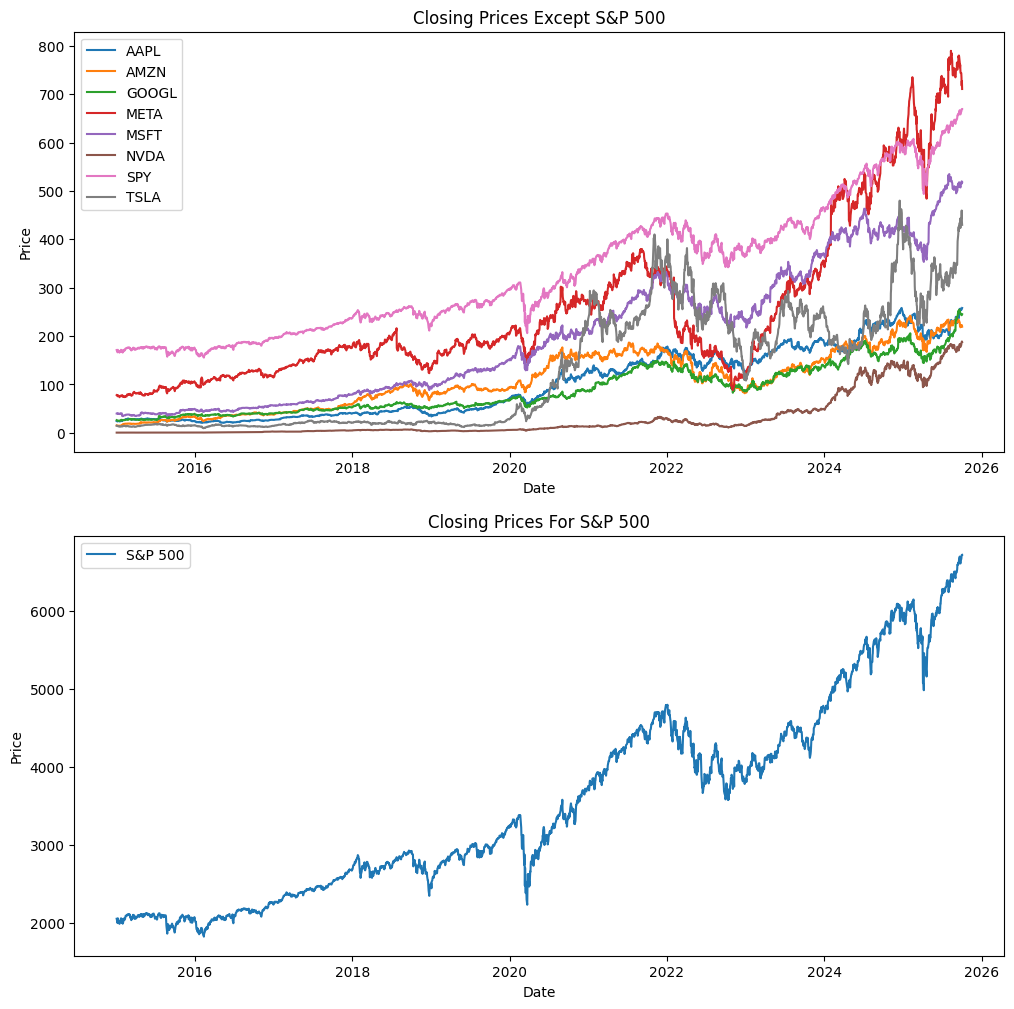

In [ ]:
# import matplotlib.pyplot as plt

# Find the right price column
# price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
# if not price_cols:
#     price_cols = [c for c in stacked.columns if "close" in c.lower()]  # fallback
# price_col = price_cols[0]  # take the first match

# plt.figure(figsize=(12,6))
# for ticker in stacked["Ticker"].unique():
#     subset = stacked[stacked["Ticker"] == ticker]
#     plt.plot(subset["Date"], subset[price_col], label=ticker)

# plt.title("Closing Prices")
# plt.xlabel("Date")
# plt.ylabel("Price")
# plt.legend()
# plt.show()
import matplotlib.pyplot as plt

# Find the right price column
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]  # fallback
price_col = price_cols[0]  # take the first match

fig, axes = plt.subplots(2, 1, figsize=(12, 12))
# plt.figure(figsize=(12,6))
all_tickers = stacked["Ticker"].unique()
all_tickers_no_sp = np.delete(all_tickers, np.where(all_tickers == 'S&P 500'))

for ticker in all_tickers_no_sp:
    subset = stacked[stacked["Ticker"] == ticker]
    axes[0].plot(subset["Date"], subset[price_col], label=ticker)

axes[0].set_title('Closing Prices Except S&P 500')
axes[0].legend()
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Price")

subset = stacked[stacked["Ticker"] == 'S&P 500']
axes[1].plot(subset["Date"], subset[price_col], label='S&P 500')
axes[1].set_title('Closing Prices For S&P 500')
axes[1].legend()
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Price")
# plt.title("Closing Prices")
plt.show();

This plot shows how different companies’ stock prices change over time. Each line is a company, with dates on the bottom and prices on the side. You can quickly see which stocks go up, which ones move together, and which ones are more stable or jumpy. It’s basically a simple way to compare how the stocks have done in the past.

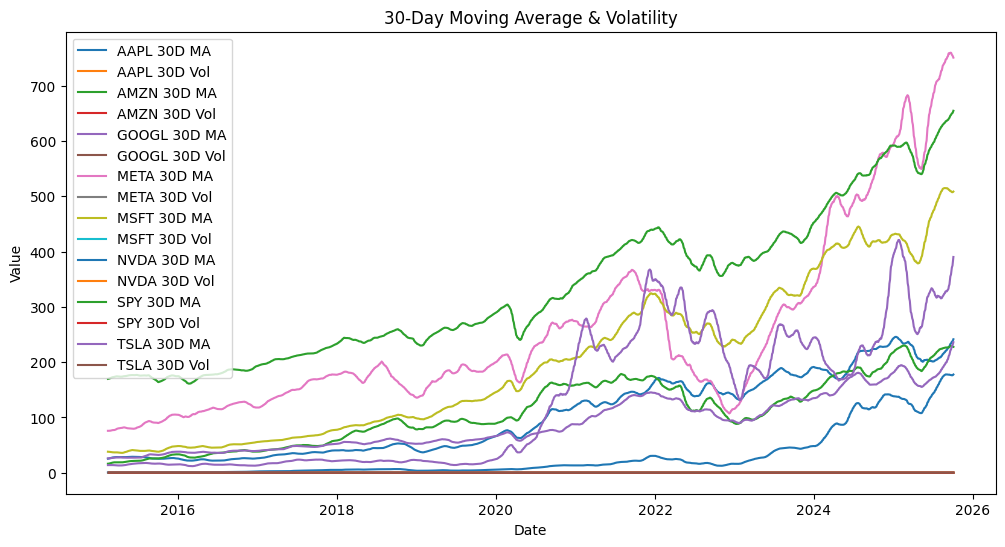

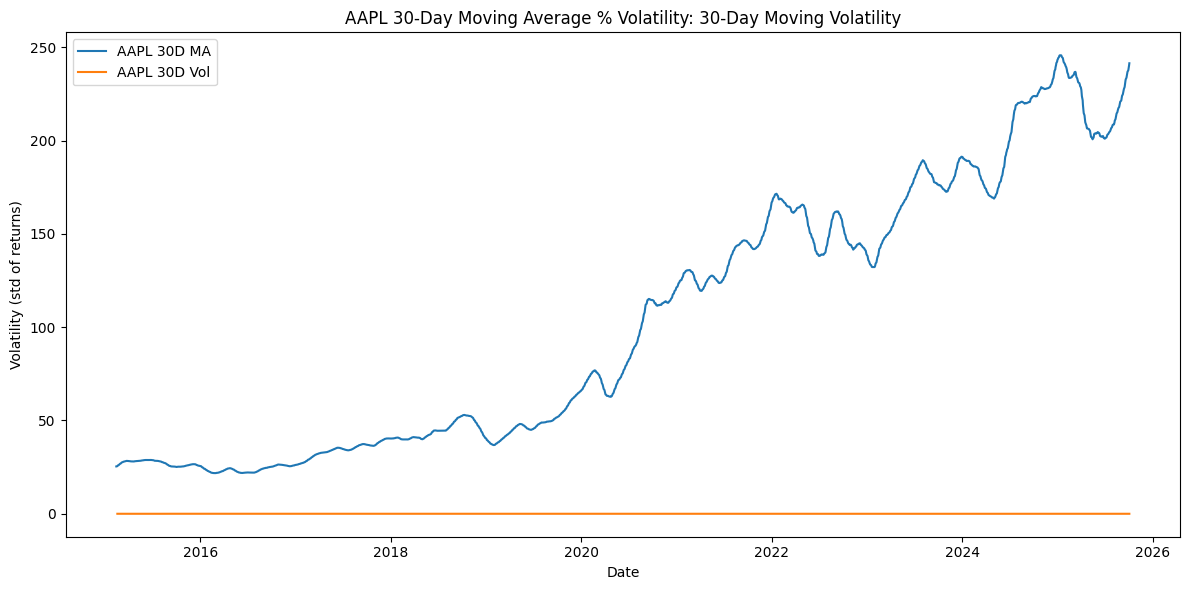

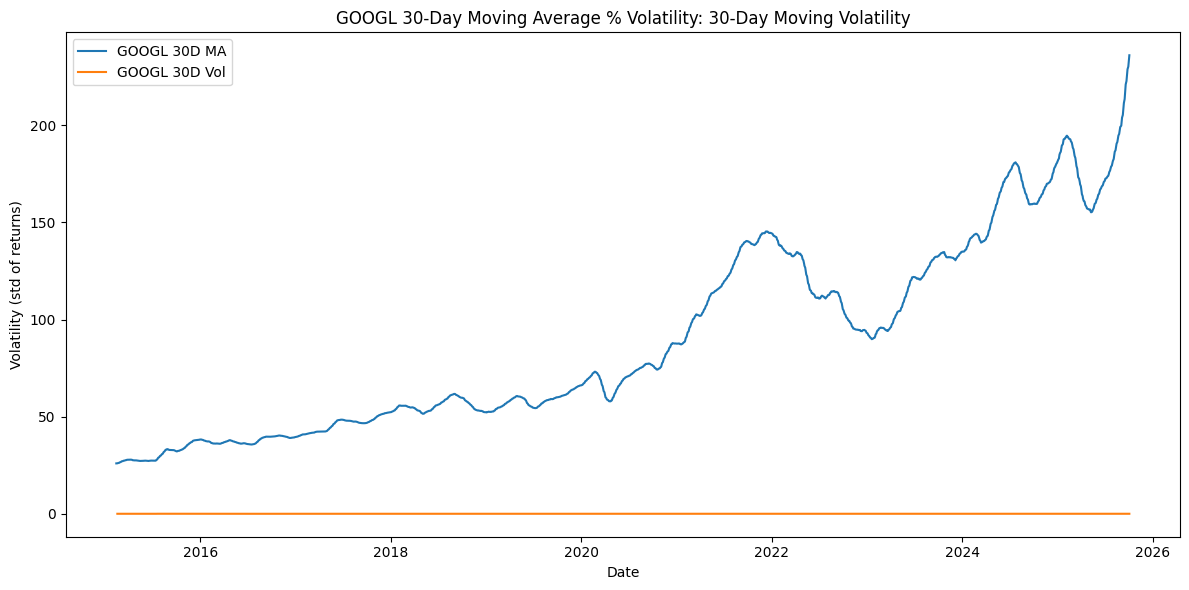

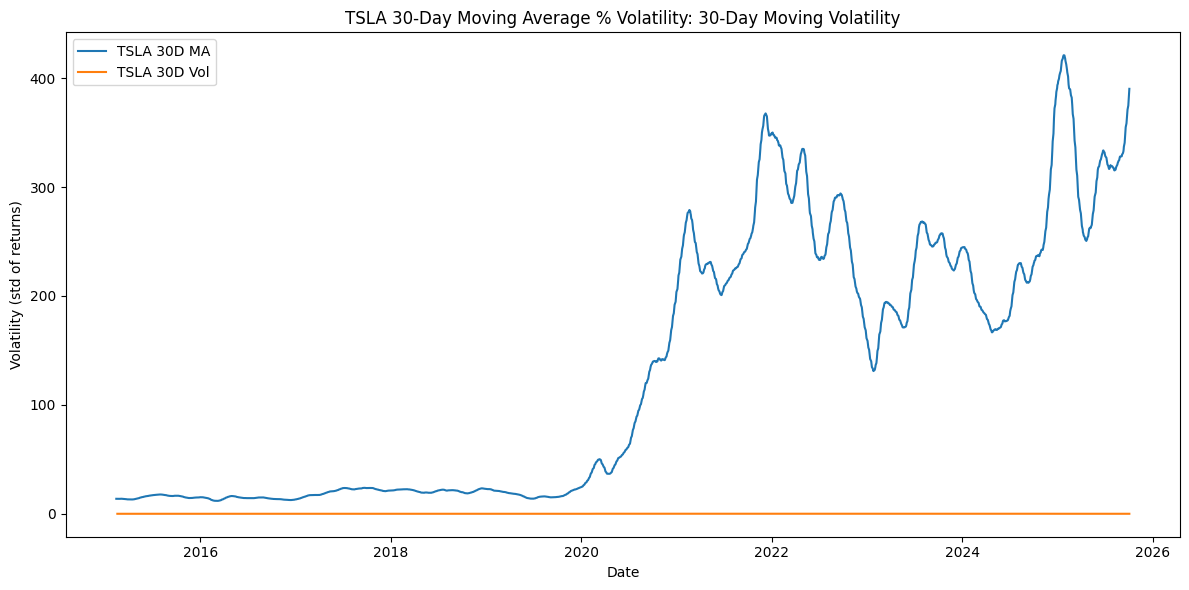

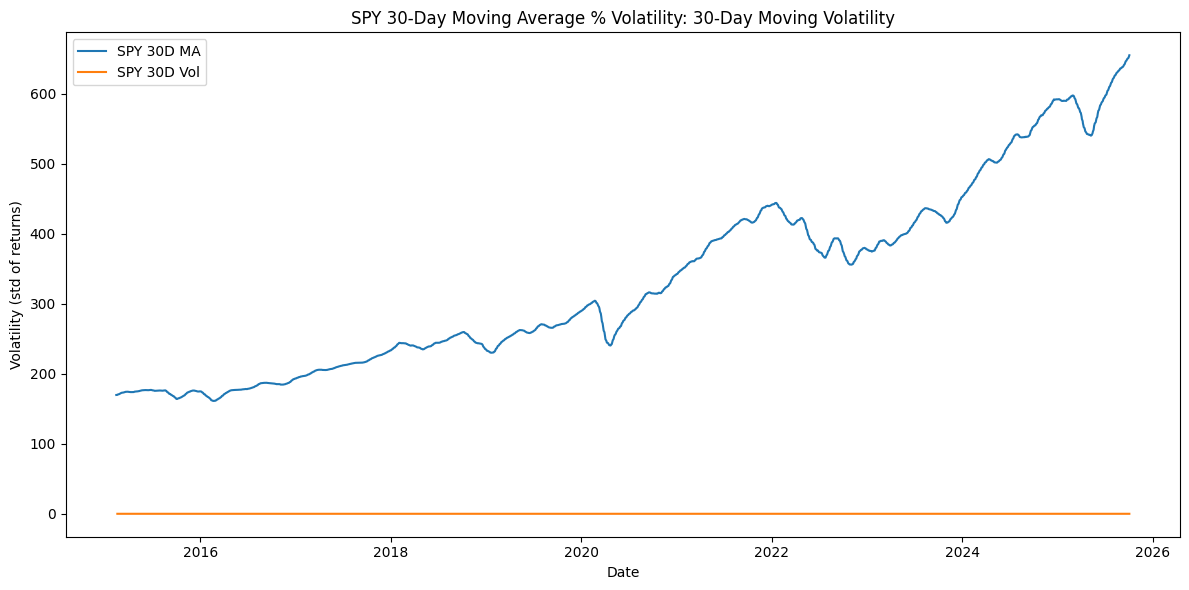

In [ ]:
import matplotlib.pyplot as plt

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in all_tickers_no_sp:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


target = "AAPL 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "AAPL"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"AAPL {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"AAPL {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()








target = "GOOGL 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "GOOGL"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"GOOGL {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"GOOGL {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()







target = "TSLA 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "TSLA"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"TSLA {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"TSLA {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()






target = "SPY 30-Day Moving Average % Volatility"

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

#
subset = stacked[stacked["Ticker"] == "SPY"].copy()

# Rolling 30-day moving average of price
subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

# Rolling 30-day volatility = std dev of daily returns
subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

# Plot the two series
plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"SPY {window}D MA")

plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"SPY {window}D Vol")
#

plt.title(f"{target}: {window}-Day Moving Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (std of returns)")
plt.legend()
plt.tight_layout()
plt.show()

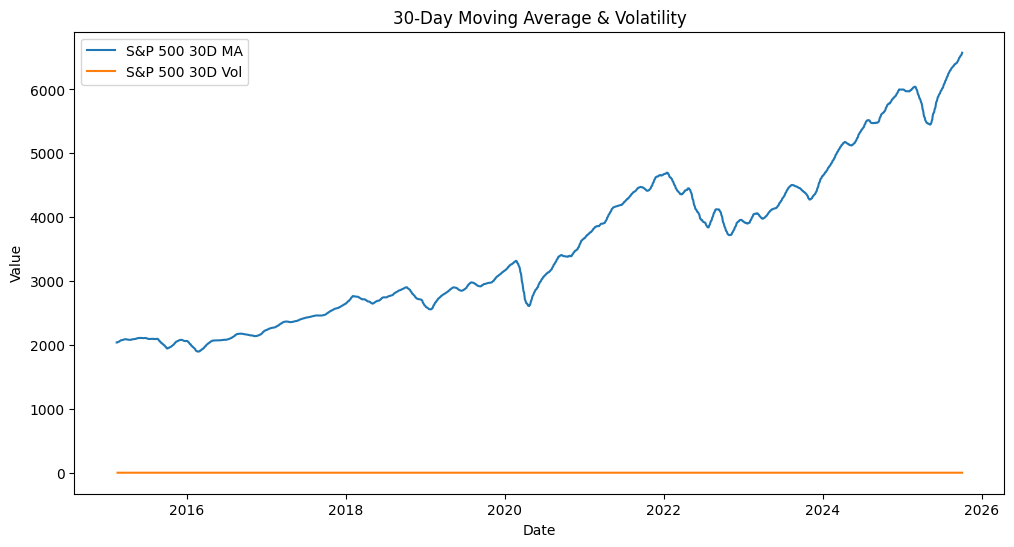

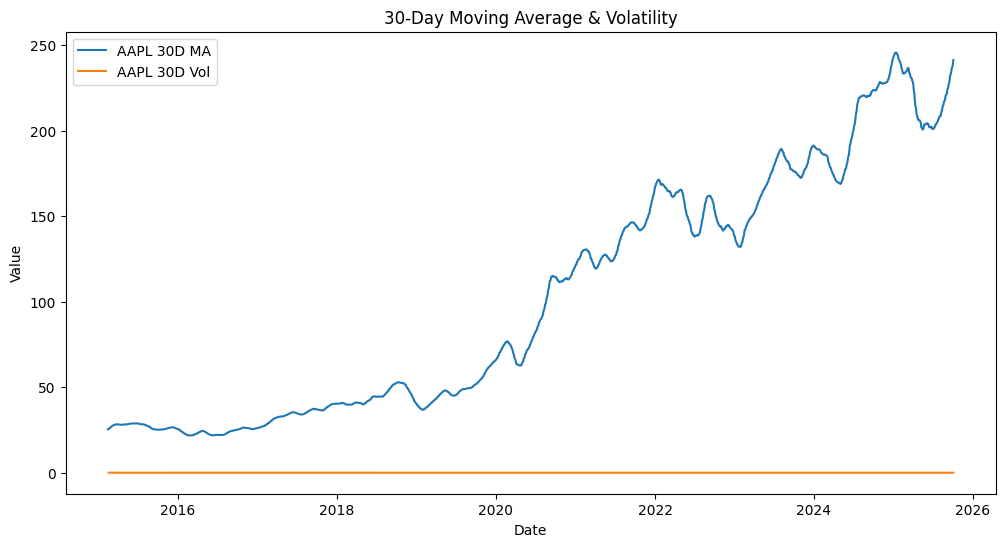

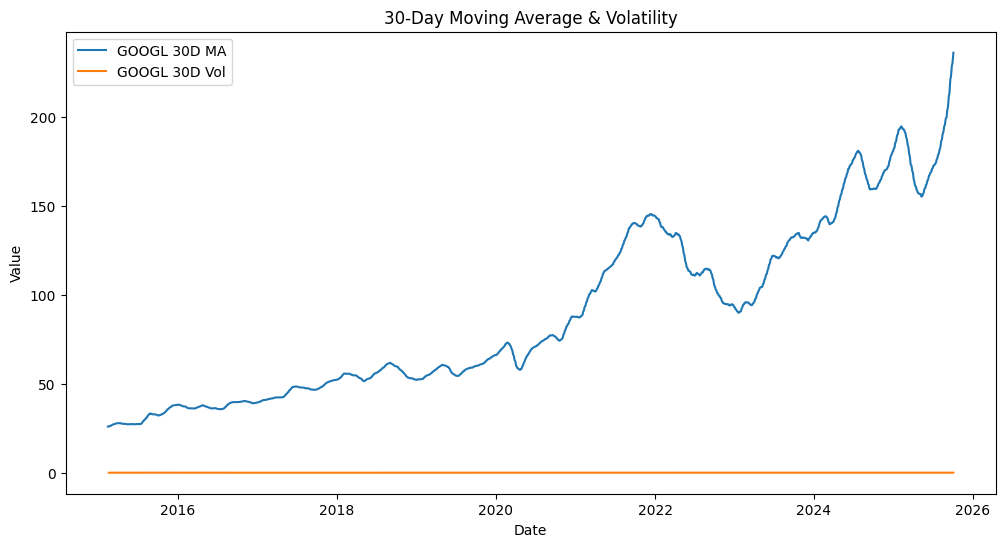

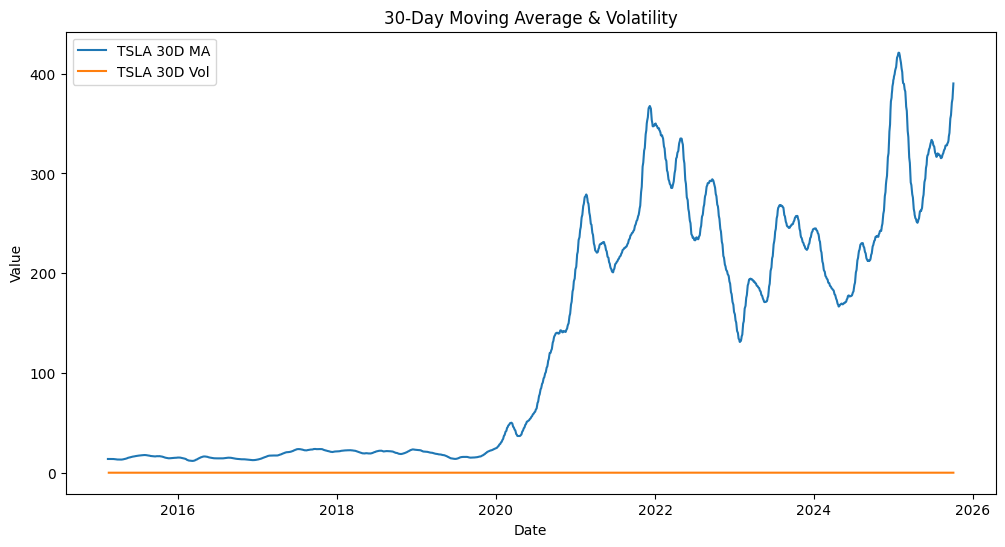

In [ ]:
import matplotlib.pyplot as plt

# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['S&P 500']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['AAPL']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()








# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['GOOGL']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()








# --- Find the right price column (Adj Close or Close) ---
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Rolling calculations ---
window = 30  # 30 trading days (~1.5 months)

plt.figure(figsize=(12,6))

for ticker in ['TSLA']:
    subset = stacked[stacked["Ticker"] == ticker].copy()

    # Rolling 30-day moving average of price
    subset["Rolling_Mean"] = subset[price_col].rolling(window).mean()

    # Rolling 30-day volatility = std dev of daily returns
    subset["Rolling_Vol"] = subset[price_col].pct_change().rolling(window).std()

    # Plot the two series
    plt.plot(subset["Date"], subset["Rolling_Mean"], label=f"{ticker} {window}D MA")
    plt.plot(subset["Date"], subset["Rolling_Vol"], label=f"{ticker} {window}D Vol")

plt.title(f"{window}-Day Moving Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

this plot shows the moving average of price over 30 days, so we can see the trends without all the daily ups and downs


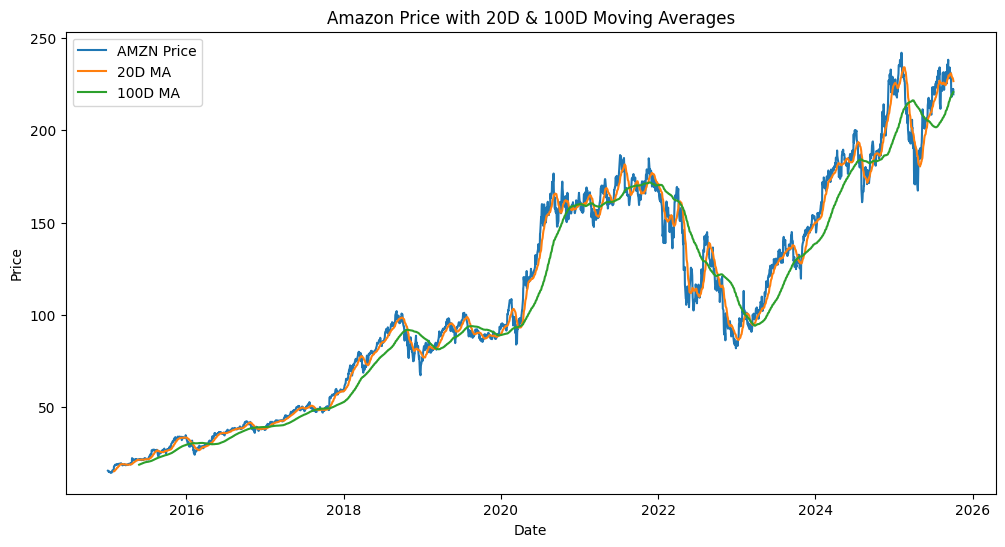

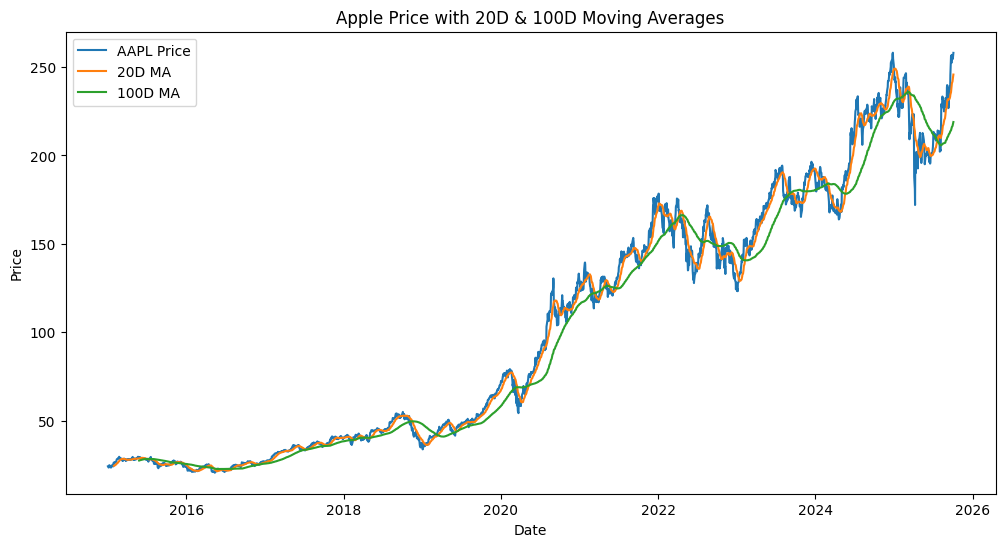

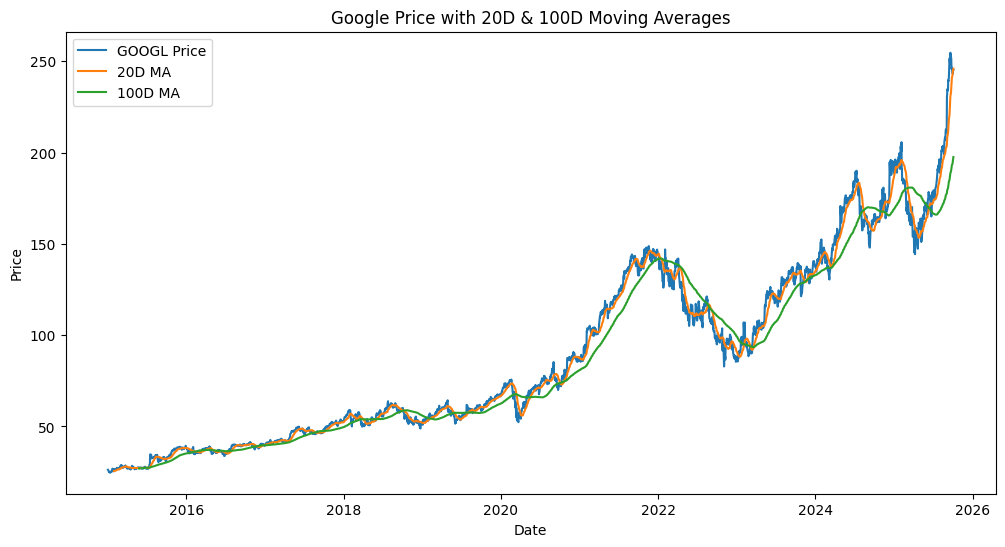

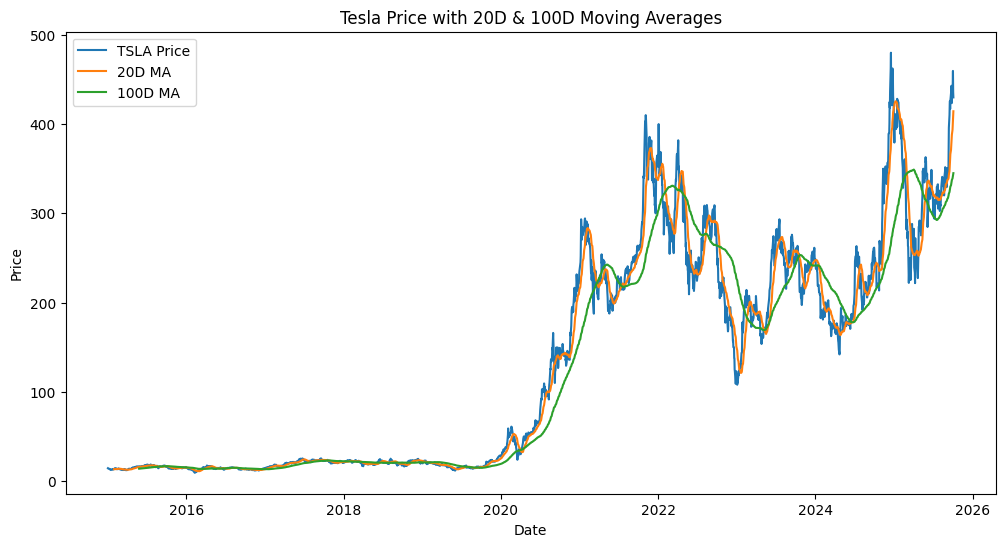

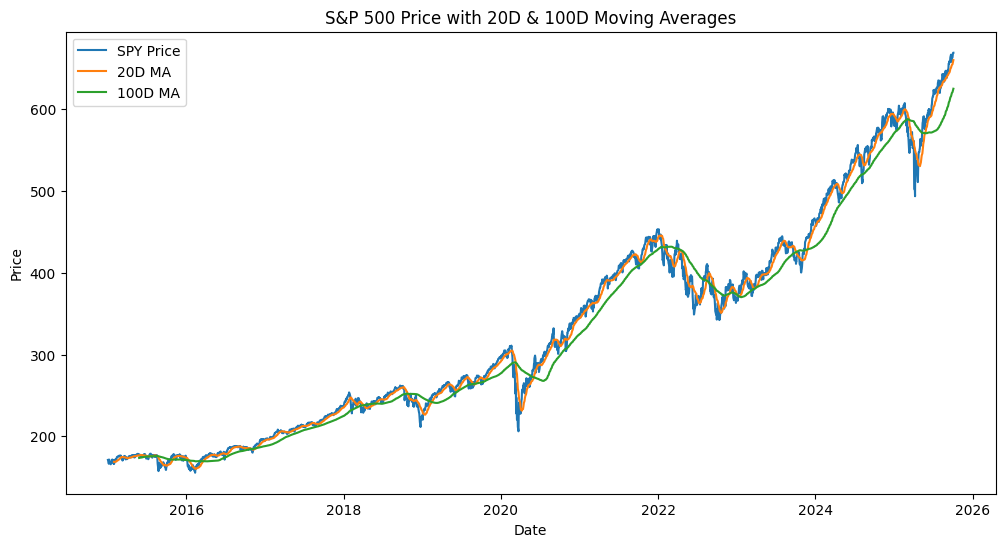

In [ ]:
# price and moving averages for Amazon
amzn = stacked[stacked["Ticker"] == "AMZN"].copy()
amzn["MA20"] = amzn["Close"].rolling(20).mean()
amzn["MA100"] = amzn["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(amzn["Date"], amzn["Close"], label="AMZN Price")
plt.plot(amzn["Date"], amzn["MA20"], label="20D MA")
plt.plot(amzn["Date"], amzn["MA100"], label="100D MA")
plt.title("Amazon Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


aapl = stacked[stacked["Ticker"] == "AAPL"].copy()
aapl["MA20"] = aapl["Close"].rolling(20).mean()
aapl["MA100"] = aapl["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(aapl["Date"], aapl["Close"], label="AAPL Price")
plt.plot(aapl["Date"], aapl["MA20"], label="20D MA")
plt.plot(aapl["Date"], aapl["MA100"], label="100D MA")
plt.title("Apple Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()



googl = stacked[stacked["Ticker"] == "GOOGL"].copy()
googl["MA20"] = googl["Close"].rolling(20).mean()
googl["MA100"] = googl["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(googl["Date"], googl["Close"], label="GOOGL Price")
plt.plot(googl["Date"], googl["MA20"], label="20D MA")
plt.plot(googl["Date"], googl["MA100"], label="100D MA")
plt.title("Google Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


tsla = stacked[stacked["Ticker"] == "TSLA"].copy()
tsla["MA20"] = tsla["Close"].rolling(20).mean()
tsla["MA100"] = tsla["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(tsla["Date"], tsla["Close"], label="TSLA Price")
plt.plot(tsla["Date"], tsla["MA20"], label="20D MA")
plt.plot(tsla["Date"], tsla["MA100"], label="100D MA")
plt.title("Tesla Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


spy = stacked[stacked["Ticker"] == "SPY"].copy()
spy["MA20"] = spy["Close"].rolling(20).mean()
spy["MA100"] = spy["Close"].rolling(100).mean()

plt.figure(figsize=(12,6))
plt.plot(spy["Date"], spy["Close"], label="SPY Price")
plt.plot(spy["Date"], spy["MA20"], label="20D MA")
plt.plot(spy["Date"], spy["MA100"], label="100D MA")
plt.title("S&P 500 Price with 20D & 100D Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

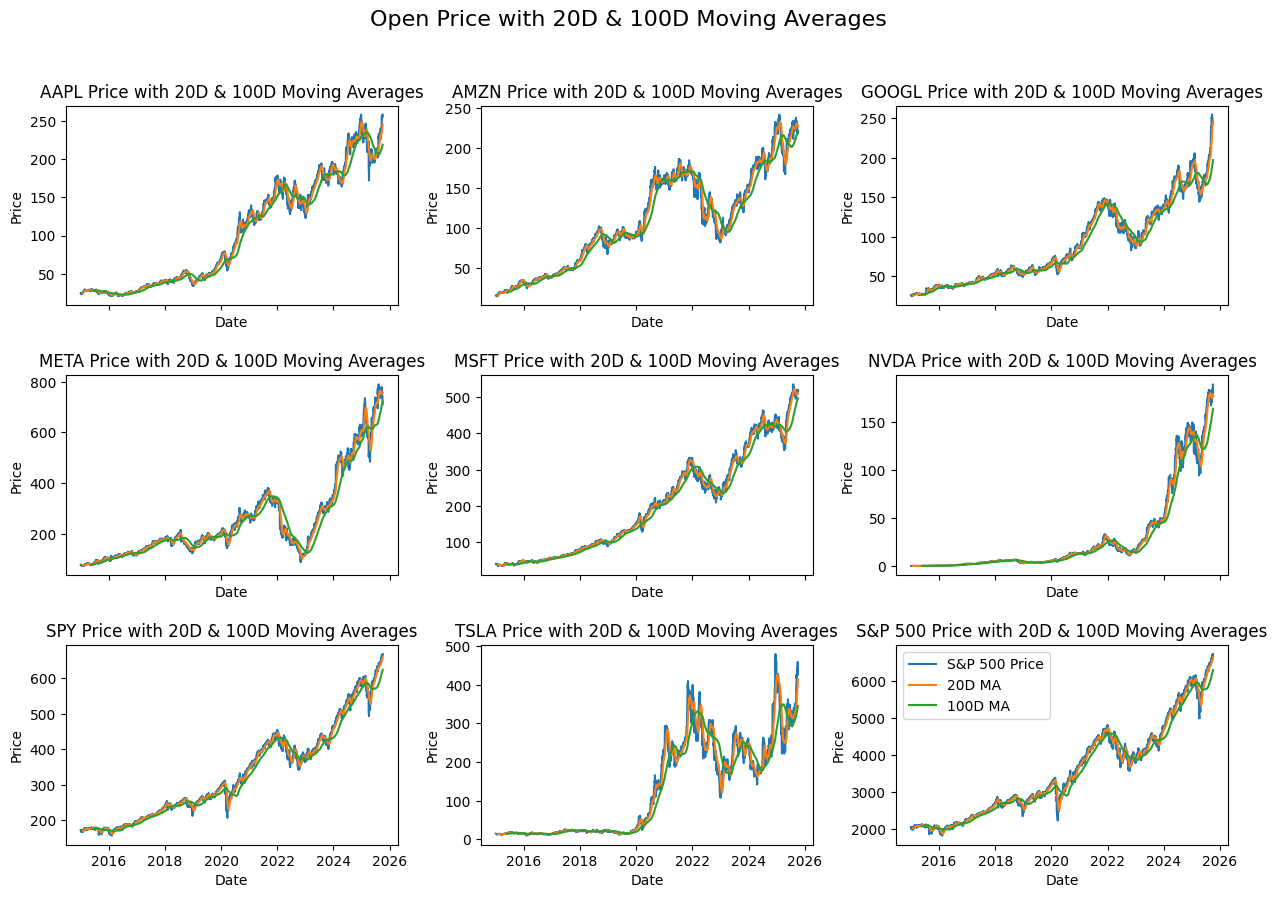

In [ ]:
import math
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["MA20"] = temp["Open"].rolling(20).mean()
  temp["MA100"] = temp["Open"].rolling(100).mean()
  ax.plot(temp["Date"], temp["Close"], label= f"{t} Price")
  ax.plot(temp["Date"], temp["MA20"], label="20D MA")
  ax.plot(temp["Date"], temp["MA100"], label="100D MA")
  ax.set_title(f"{t} Price with 20D & 100D Moving Averages")
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")

fig.suptitle("Open Price with 20D & 100D Moving Averages", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show()

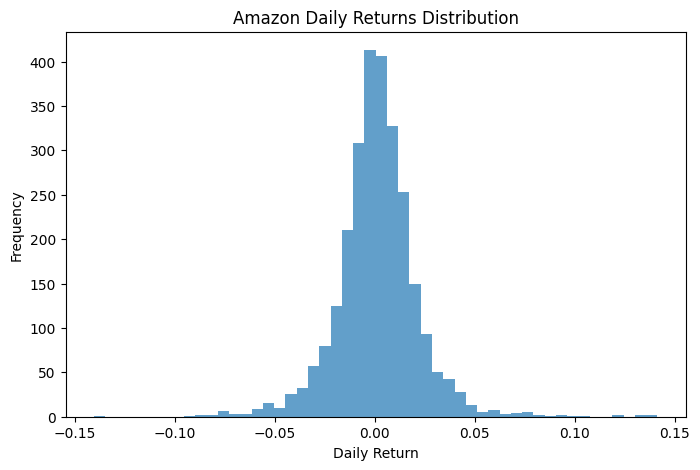

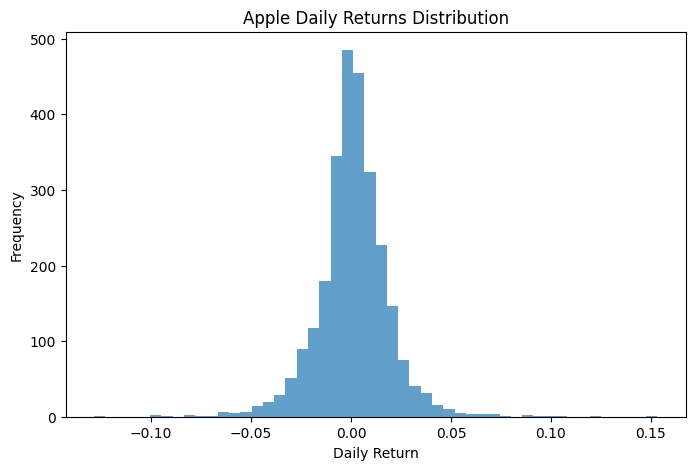

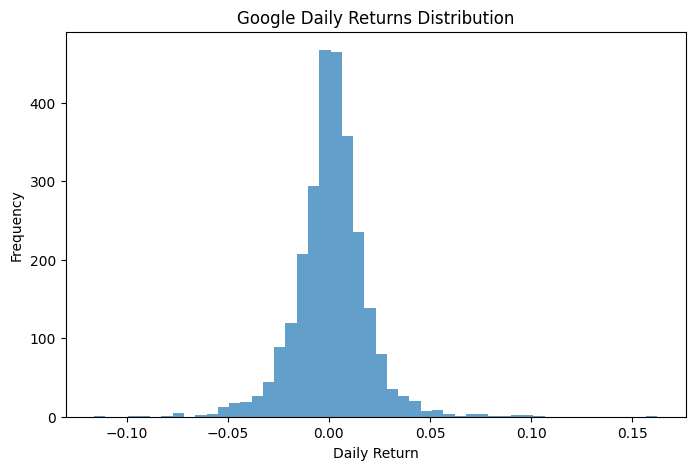

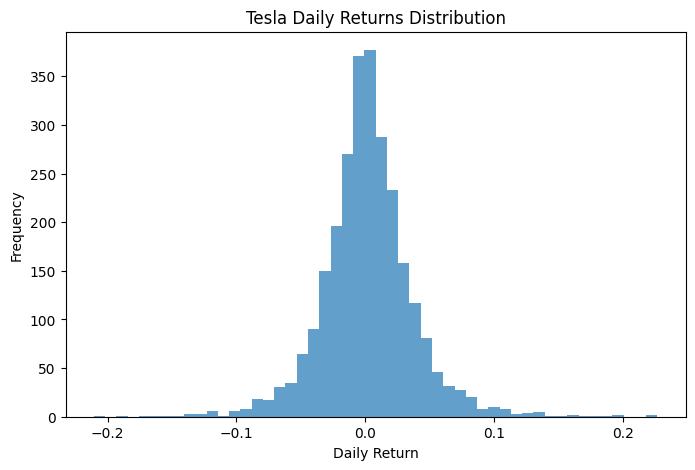

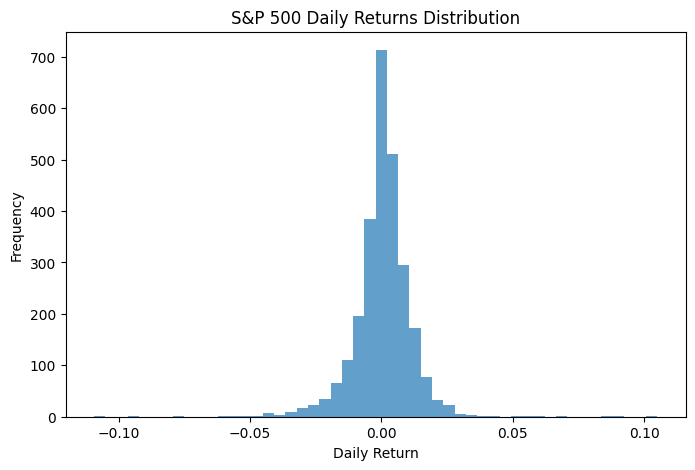

In [ ]:
#Daily Returns Distribution
amzn["Return"] = amzn["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(amzn["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Amazon Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


aapl["Return"] = aapl["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(aapl["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Apple Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
googl["Return"] = googl["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(googl["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Google Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
tsla["Return"] = tsla["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(tsla["Return"].dropna(), bins=50, alpha=0.7)
plt.title("Tesla Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()



#Daily Returns Distribution
spy["Return"] = spy["Close"].pct_change()

plt.figure(figsize=(8,5))
plt.hist(spy["Return"].dropna(), bins=50, alpha=0.7)
plt.title("S&P 500 Daily Returns Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-357590628.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


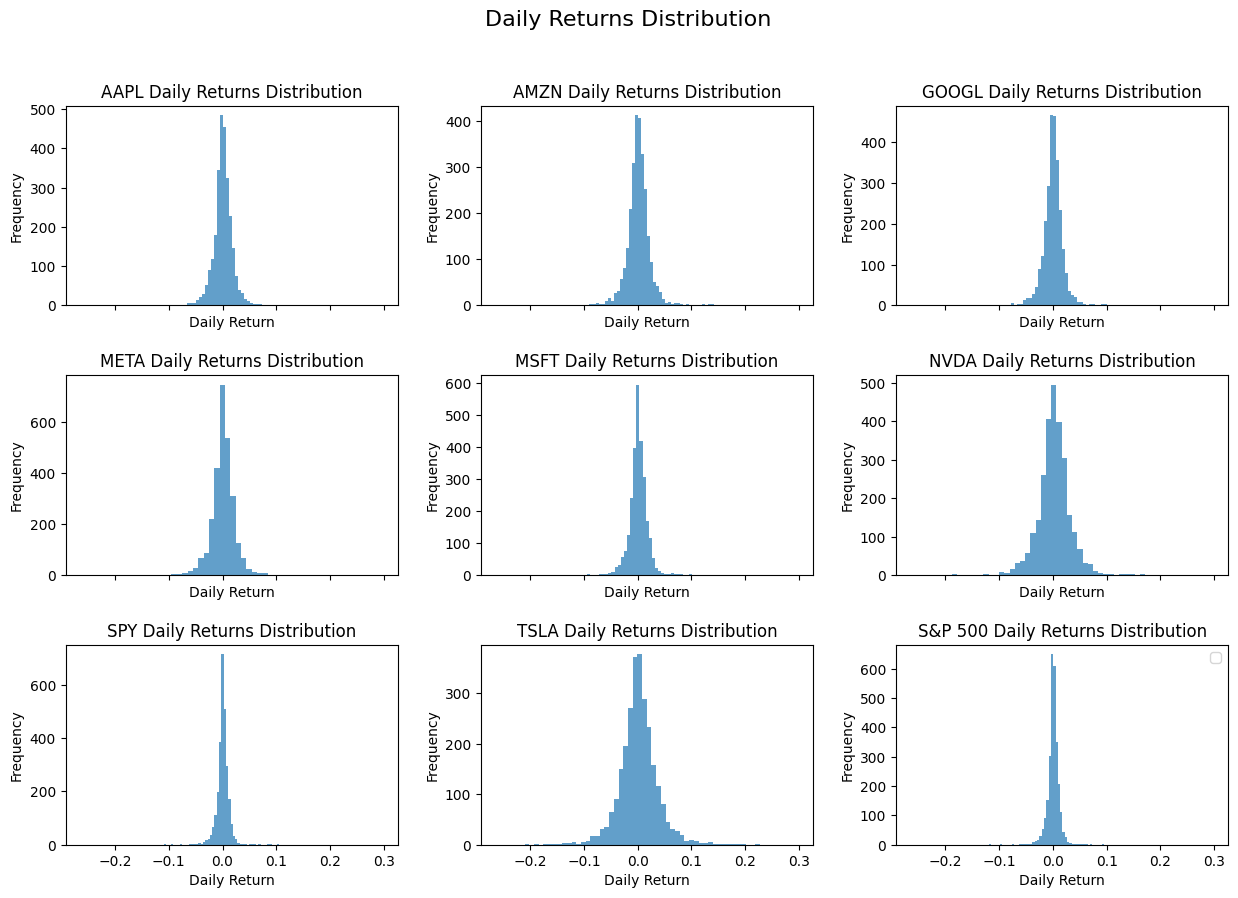

In [ ]:
import math

#Daily Returns Distribution
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["Return"] = temp["Close"].pct_change()
  ax.hist(temp["Return"].dropna(), bins=50, alpha=0.7)
  ax.set_title(f"{t} Daily Returns Distribution")
  ax.set_xlabel("Daily Return")
  ax.set_ylabel("Frequency")

fig.suptitle("Daily Returns Distribution", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show();

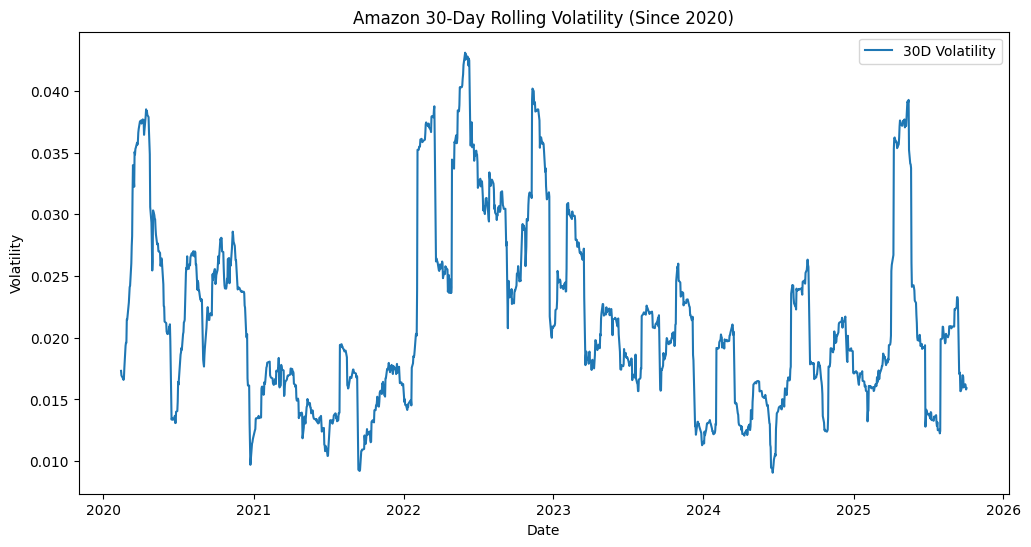

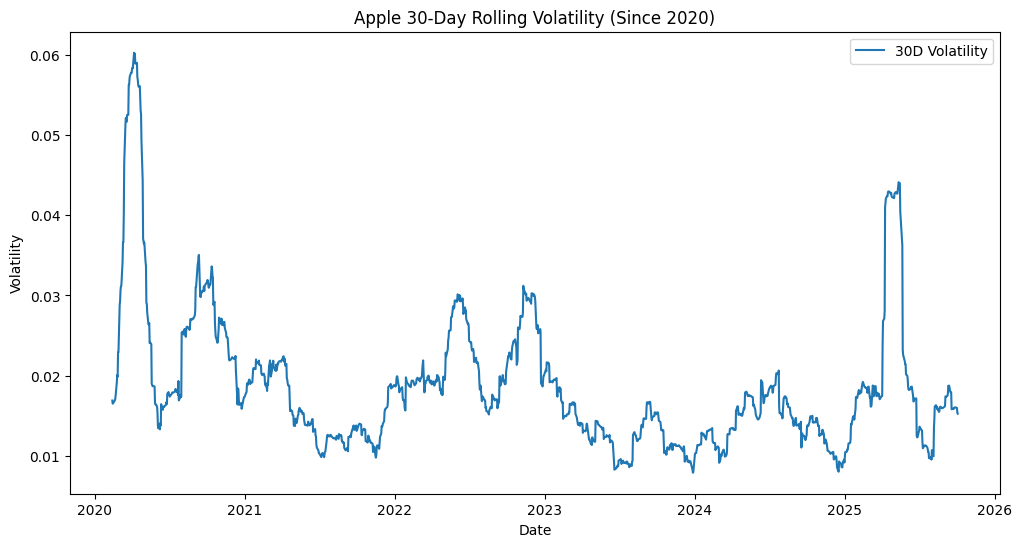

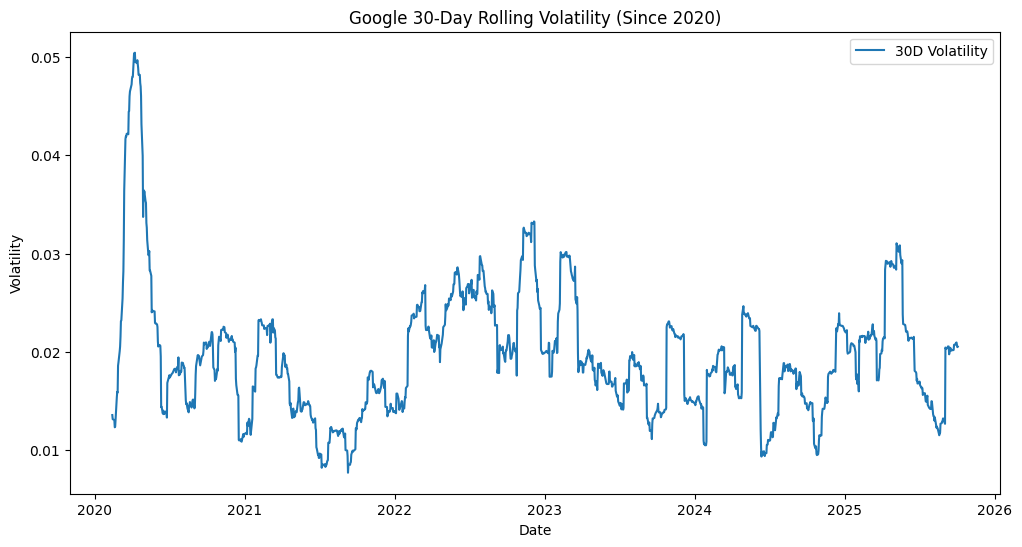

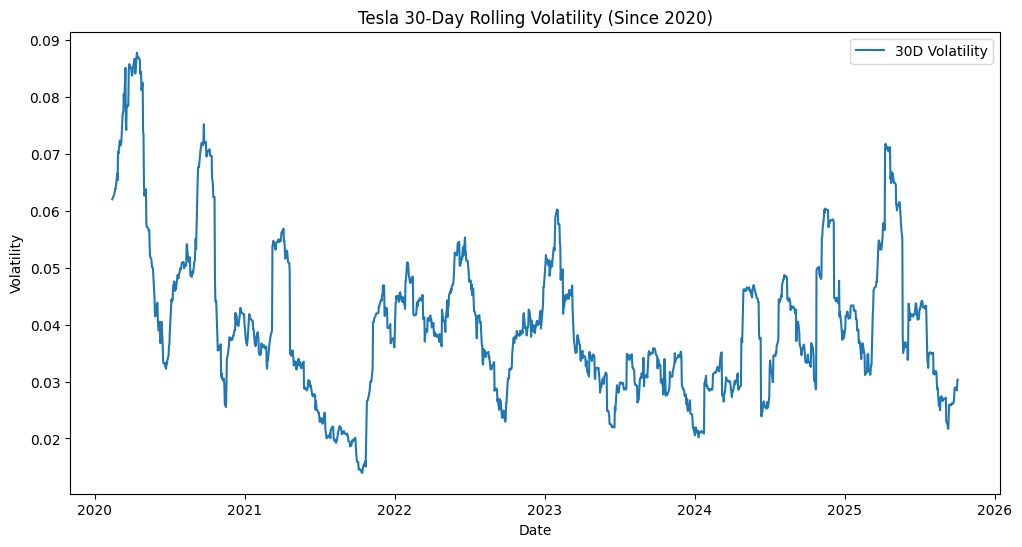

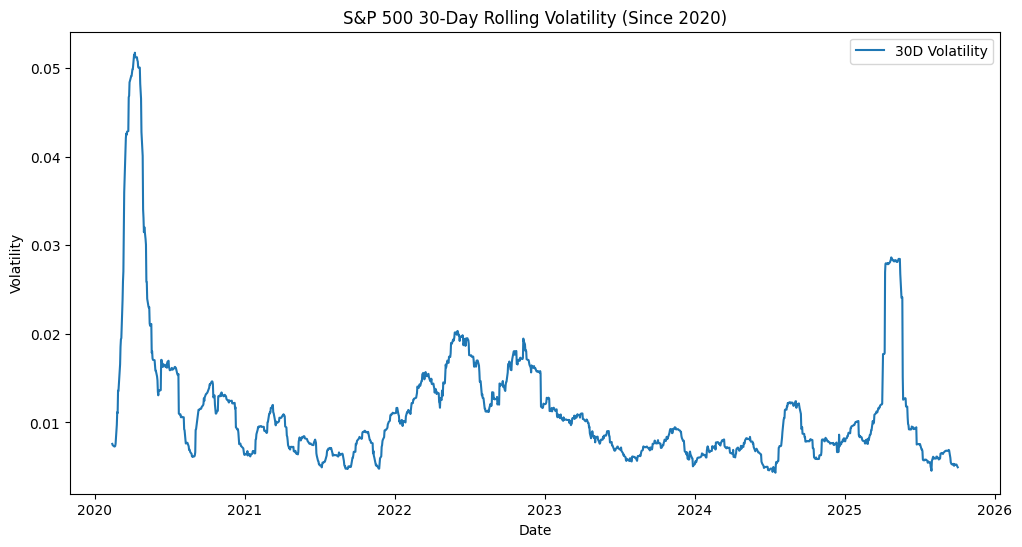

In [ ]:
#Rolling Volatility (since 2020)
amzn_recent = amzn[amzn["Date"] >= "2020-01-01"].copy()
amzn_recent["RollingVol30"] = amzn_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(amzn_recent["Date"], amzn_recent["RollingVol30"], label="30D Volatility")
plt.title("Amazon 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


aapl_recent = aapl[aapl["Date"] >= "2020-01-01"].copy()
aapl_recent["RollingVol30"] = aapl_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(aapl_recent["Date"], aapl_recent["RollingVol30"], label="30D Volatility")
plt.title("Apple 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()



googl_recent = googl[googl["Date"] >= "2020-01-01"].copy()
googl_recent["RollingVol30"] = googl_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(googl_recent["Date"], googl_recent["RollingVol30"], label="30D Volatility")
plt.title("Google 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()



tsla_recent = tsla[tsla["Date"] >= "2020-01-01"].copy()
tsla_recent["RollingVol30"] = tsla_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(tsla_recent["Date"], tsla_recent["RollingVol30"], label="30D Volatility")
plt.title("Tesla 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


spy_recent = spy[spy["Date"] >= "2020-01-01"].copy()
spy_recent["RollingVol30"] = spy_recent["Return"].rolling(30).std()

plt.figure(figsize=(12,6))
plt.plot(spy_recent["Date"], spy_recent["RollingVol30"], label="30D Volatility")
plt.title("S&P 500 30-Day Rolling Volatility (Since 2020)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

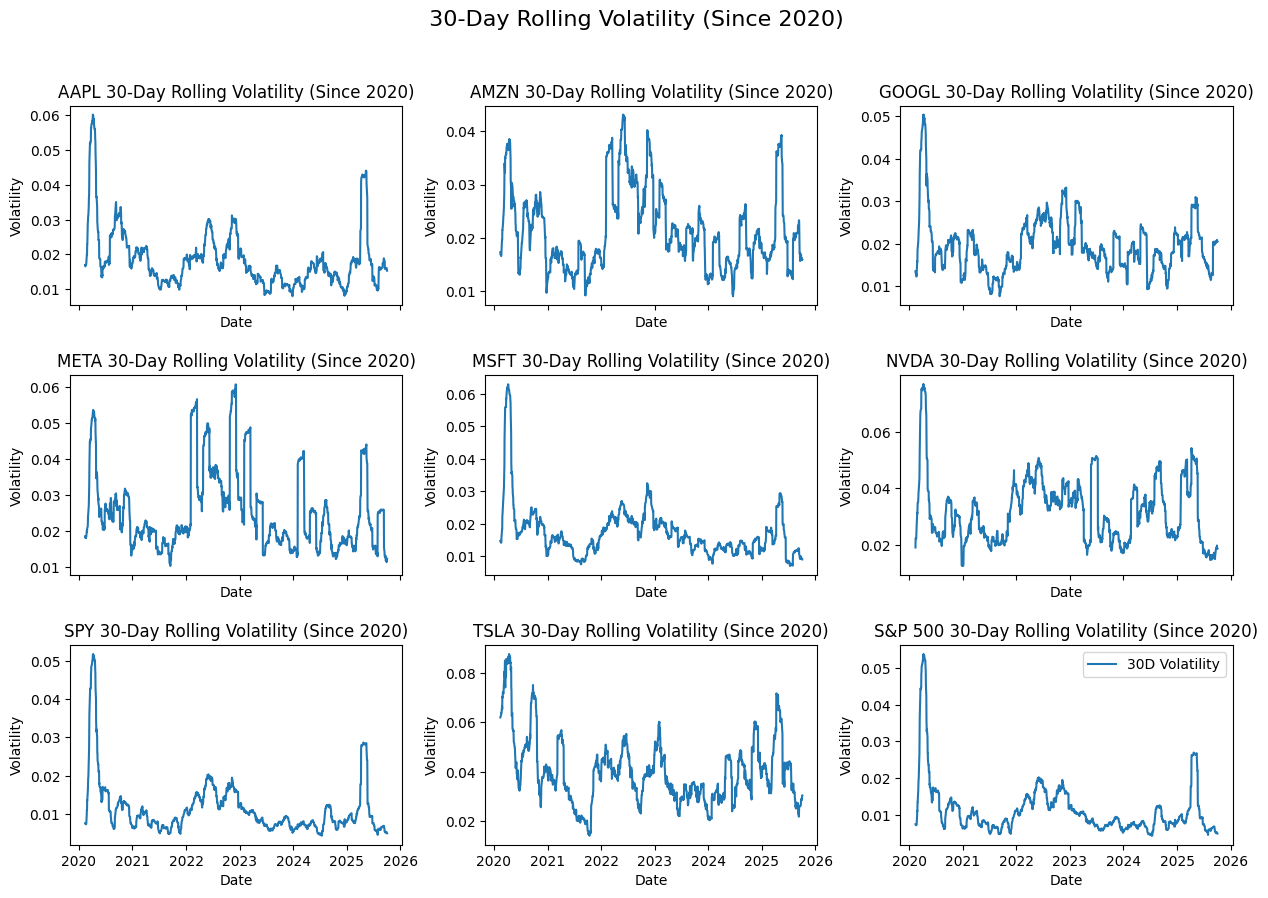

In [ ]:
#Rolling Volatility (since 2020)
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  temp["Return"] = temp["Close"].pct_change()
  temp_recent = temp[temp['Date'] >= "2020-01-01"].copy()
  temp_recent["RollingVol30"] = temp_recent["Return"].rolling(30).std()
  ax.plot(temp_recent["Date"], temp_recent["RollingVol30"], label="30D Volatility")
  ax.set_title(f"{t} 30-Day Rolling Volatility (Since 2020)")
  ax.set_xlabel("Date")
  ax.set_ylabel("Volatility")

fig.suptitle(" 30-Day Rolling Volatility (Since 2020)", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show();

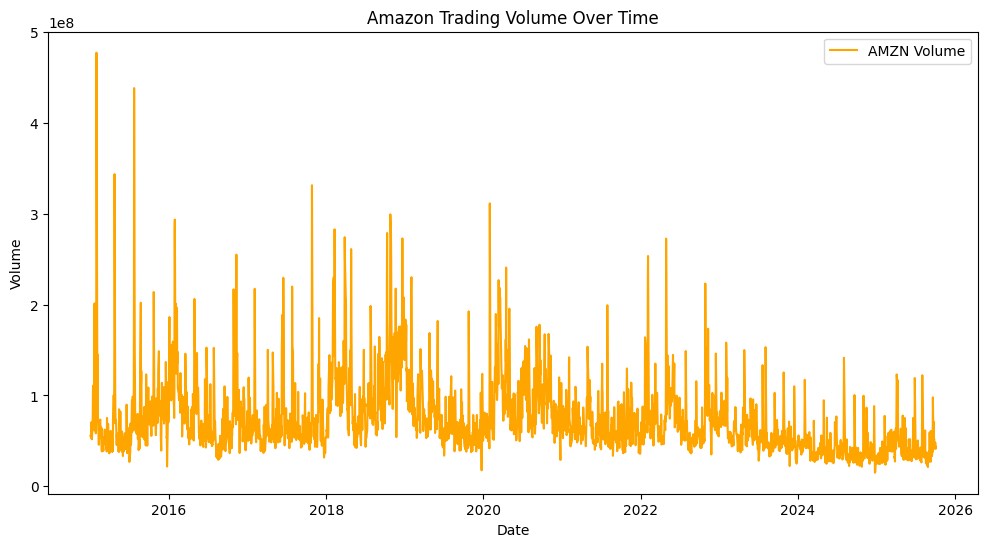

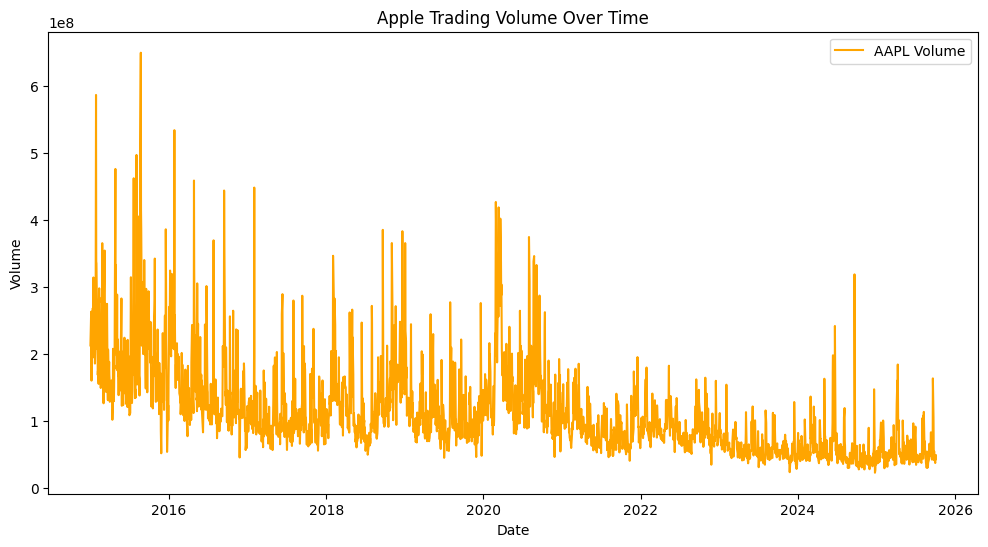

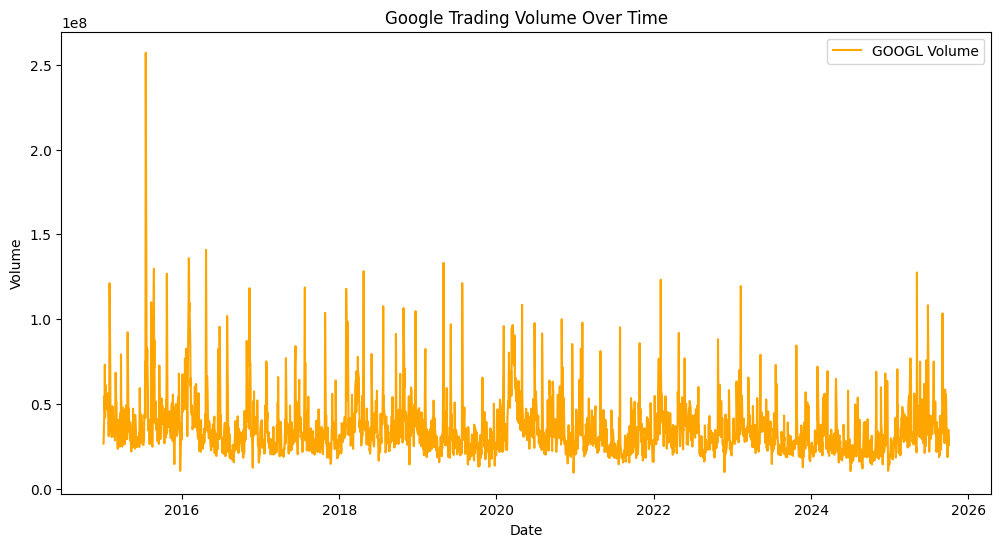

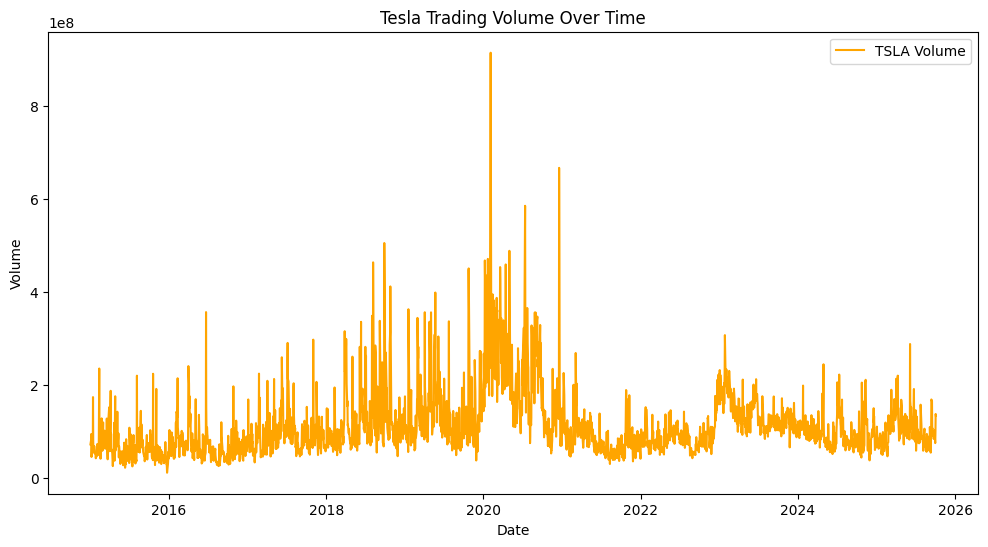

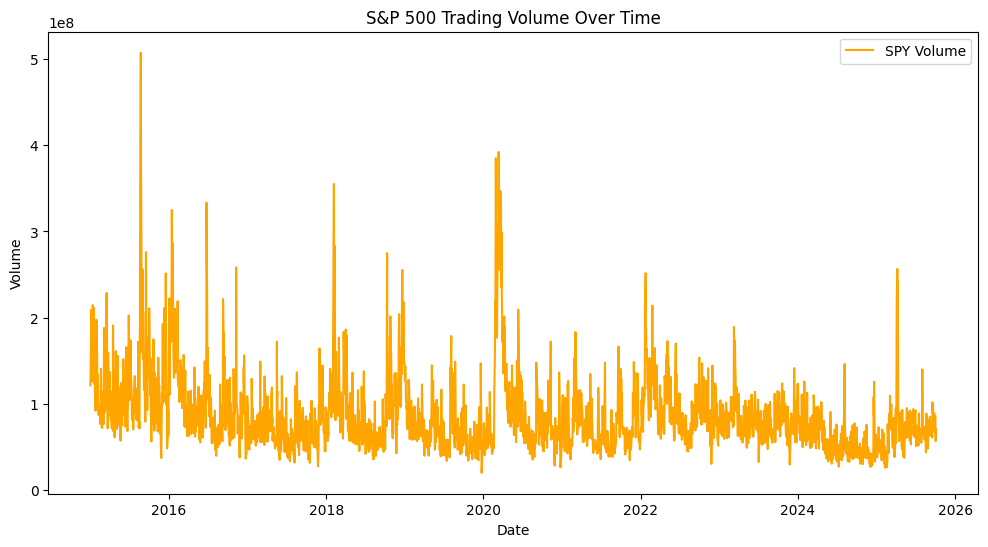

In [ ]:
#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(amzn["Date"], amzn["Volume"], label="AMZN Volume", color="orange")
plt.title("Amazon Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
plt.plot(aapl["Date"], aapl["Volume"], label="AAPL Volume", color="orange")
plt.title("Apple Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(googl["Date"], googl["Volume"], label="GOOGL Volume", color="orange")
plt.title("Google Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(tsla["Date"], tsla["Volume"], label="TSLA Volume", color="orange")
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()




#Trading Volume
plt.figure(figsize=(12,6))
plt.plot(spy["Date"], spy["Volume"], label="SPY Volume", color="orange")
plt.title("S&P 500 Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

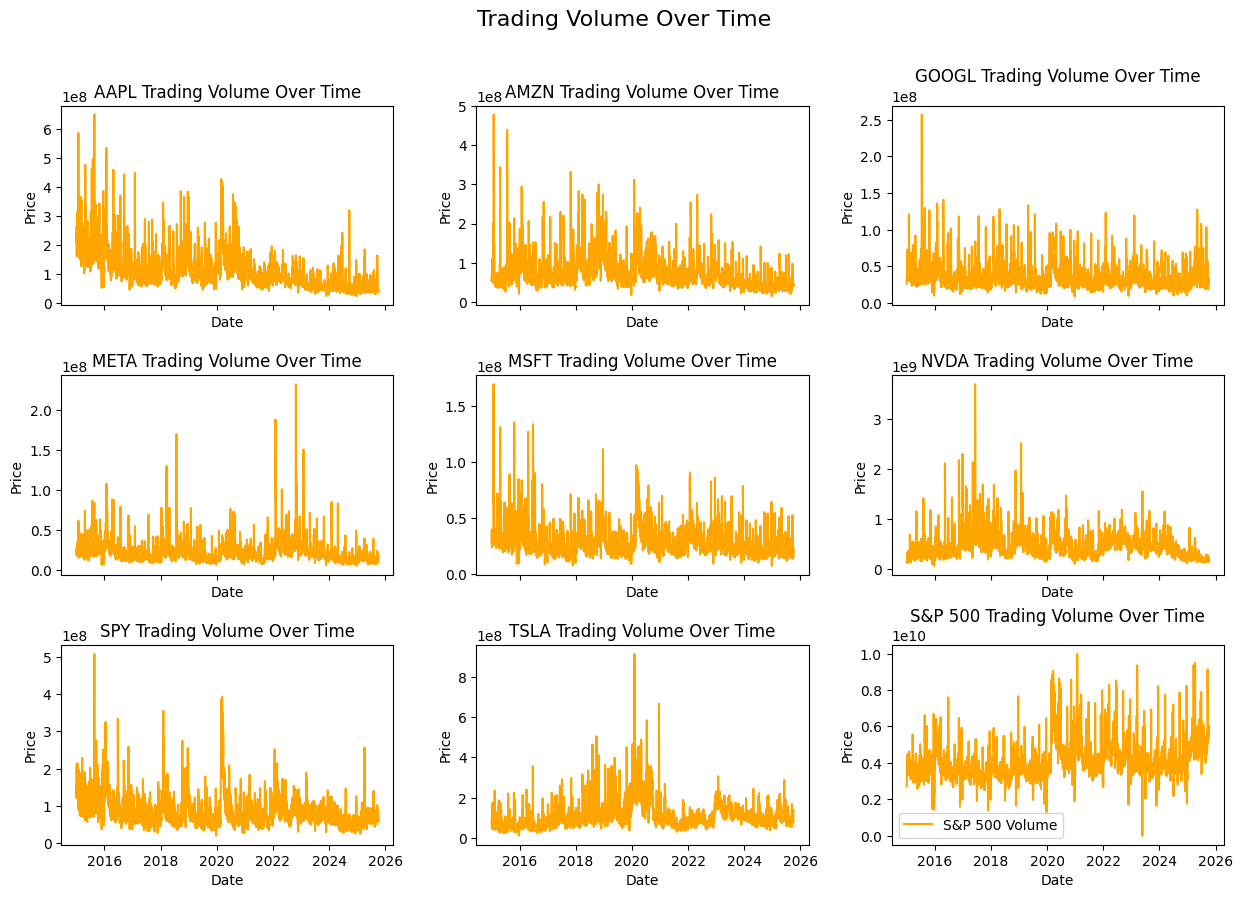

In [ ]:
#Trading Volume
tickers = stacked["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
  ax = axes[i]
  temp = stacked[stacked["Ticker"] == t].copy()
  ax.plot(temp["Date"], temp["Volume"], label=f"{t} Volume", color="orange")
  ax.set_title(f"{t} Trading Volume Over Time")
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")

fig.suptitle("Trading Volume Over Time", fontsize=16, y=0.98)
plt.subplots_adjust(wspace=0.25, hspace=0.35)
plt.legend()
plt.show()

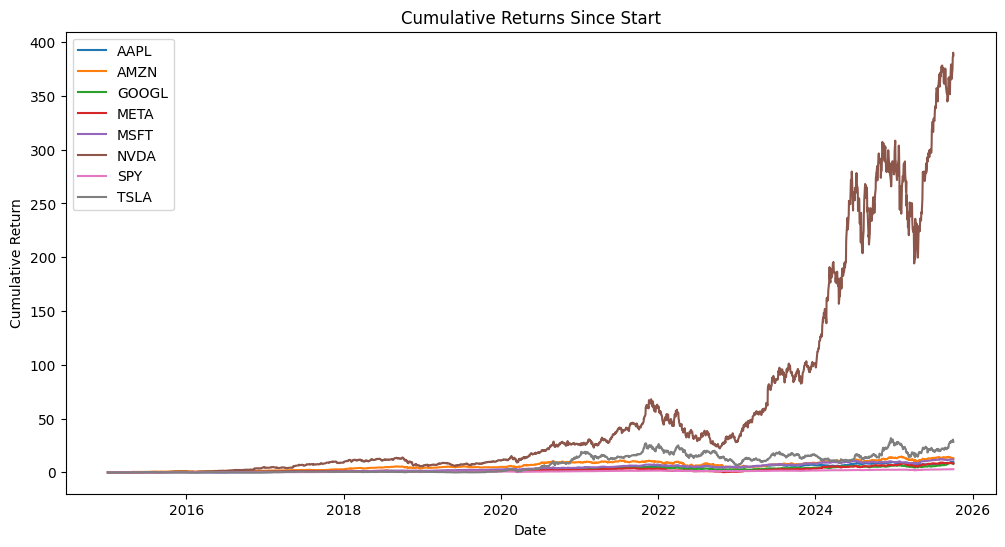

In [ ]:
plt.figure(figsize=(12,6))
for t in all_tickers_no_sp:
    sub = stacked[stacked["Ticker"] == t].sort_values("Date").copy()
    sub["Return"] = sub["Close"].pct_change()
    sub["CumRet"] = (1 + sub["Return"].fillna(0)).cumprod() - 1
    plt.plot(sub["Date"], sub["CumRet"], label=t)

plt.title("Cumulative Returns Since Start")
plt.xlabel("Date"); plt.ylabel("Cumulative Return")
plt.legend(); plt.show()

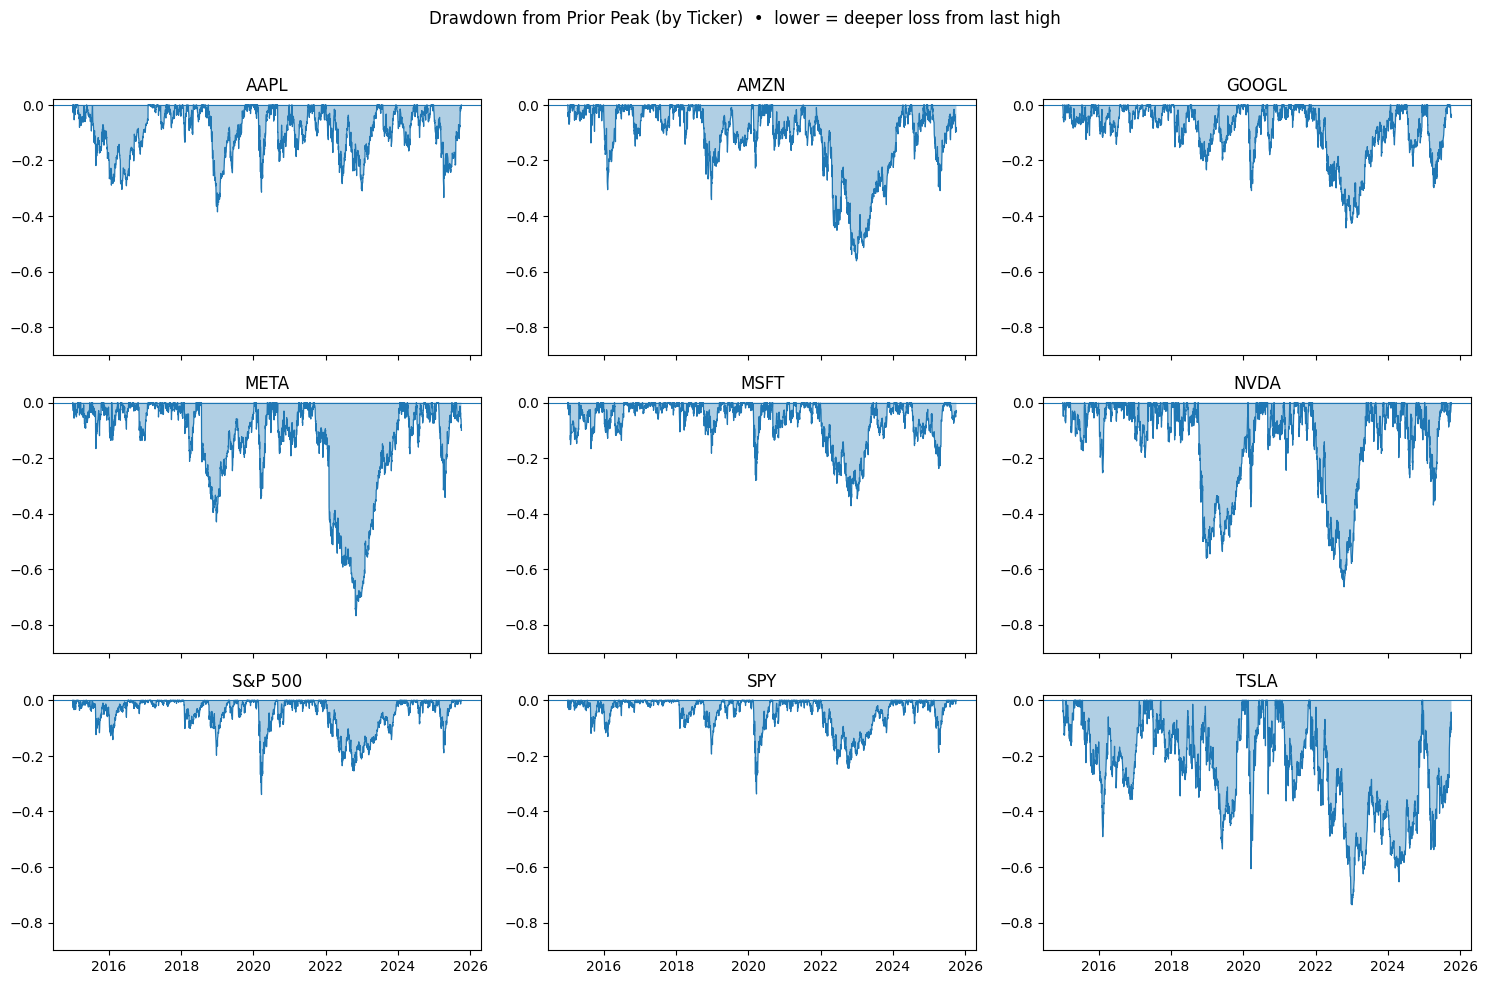

In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# --- Setup: ensure datetime + find price column ---
stacked["Date"] = pd.to_datetime(stacked["Date"])
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# --- Compute drawdown per ticker ---
df = stacked.sort_values(["Ticker", "Date"]).copy()
df["CumMax"] = df.groupby("Ticker")[price_col].cummax()
df["Drawdown"] = df[price_col] / df["CumMax"] - 1  # (price / peak) - 1  → 0 at peaks, negative when below
""
# --- Small multiples: one subplot per ticker ---
tickers = df["Ticker"].dropna().unique().tolist()
n = len(tickers)
cols = 3 if n >= 6 else 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 3.2*rows), sharex=True)
if isinstance(axes, plt.Axes):  # if only 1 axis returned
    axes = [axes]
else:
    axes = axes.flatten()

for i, t in enumerate(tickers):
    ax = axes[i]
    sub = df[df["Ticker"] == t].sort_values("Date").copy()
    sub = sub.dropna(subset=["Drawdown"])
    # area + line so dips are obvious
    ax.fill_between(sub["Date"], sub["Drawdown"], 0, step="pre", alpha=0.35)
    ax.plot(sub["Date"], sub["Drawdown"], linewidth=0.9)
    ax.axhline(0, linewidth=0.8)
    ax.set_title(t)
    ax.set_ylim(min(-0.9, sub["Drawdown"].min()), 0.02)  # cap top slightly above 0

# Hide any empty axes
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Drawdown from Prior Peak (by Ticker)  •  lower = deeper loss from last high", y=1.02)
plt.tight_layout()
plt.show()


drawdown plot shows when each stock was furthest below its recent peak so we can line those dips up with specific headlines.This helps us see if lots of news or bad headlines line up with bigger drops and slower recoveries or even happen right before them.

In [ ]:
!pip -q install kagglehub

import os, shutil, kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


Using Colab cache for faster access to the 'financial-news-headlines' dataset.
KaggleHub cached at: /kaggle/input/financial-news-headlines


'/content/news_data'

In [ ]:
# === Recreate `stacked` if it's missing ===
import pandas as pd, yfinance as yf

# Use your tickers; edit if needed
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY"]
START, END = "2015-01-01", None

if "stacked" not in globals():
    # Reuse existing yfinance output if present; otherwise download
    if "data" not in globals():
        data = yf.download(" ".join(TICKERS), start=START, end=END,
                           auto_adjust=False, actions=False, progress=False)

    # Convert yfinance wide (MultiIndex columns) -> long format with Date/Ticker columns
    if isinstance(data.columns, pd.MultiIndex):
        stacked = (
            data.stack(level=-1)
                .rename_axis(index=["Date","Ticker"])
                .reset_index()
                .sort_values(["Ticker","Date"])
        )
    else:

        df = data.reset_index().copy()
        df["Ticker"] = TICKERS[0]
        stacked = df.sort_values(["Ticker","Date"])



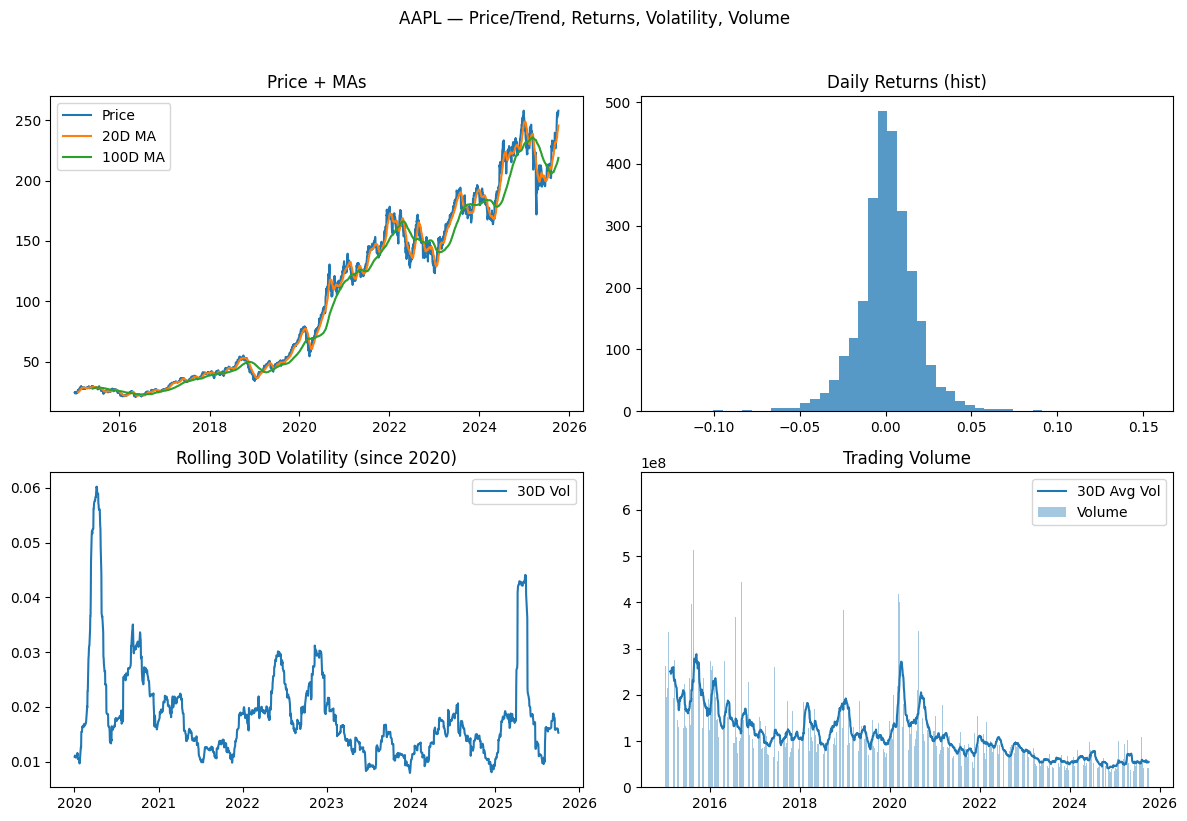

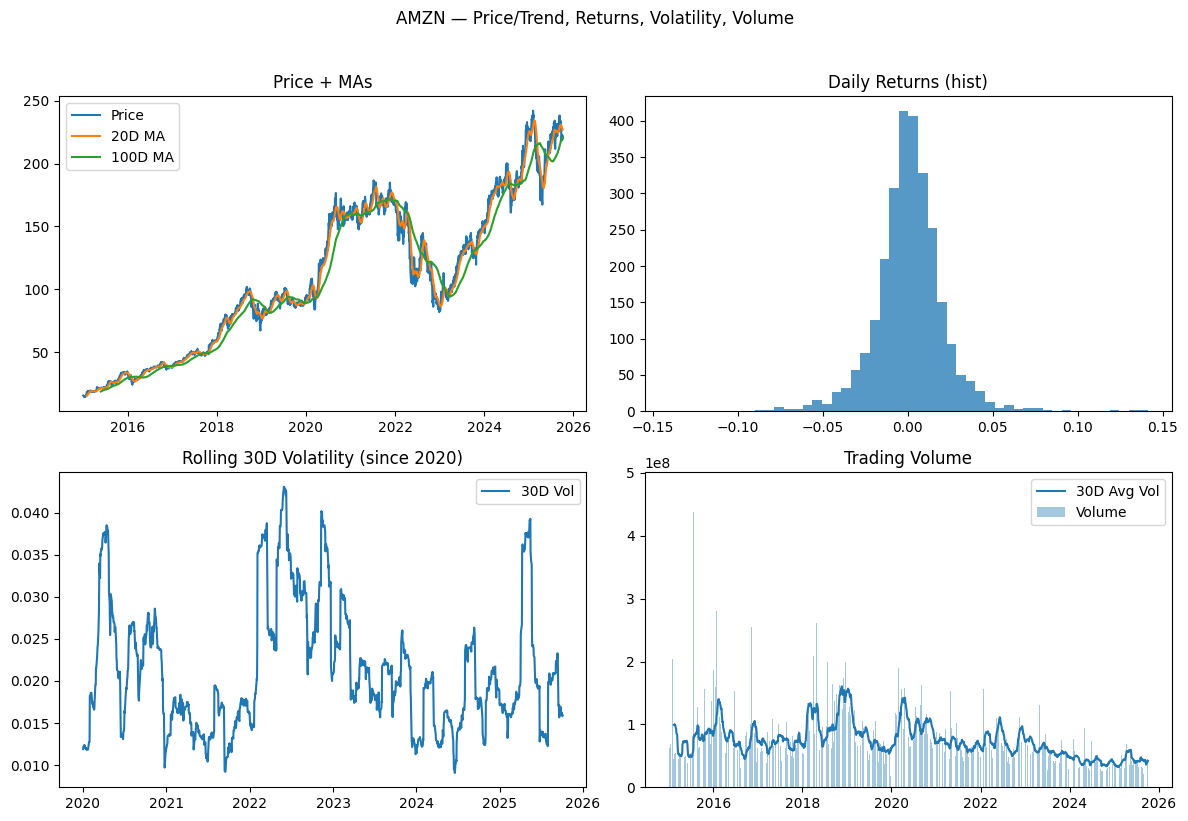

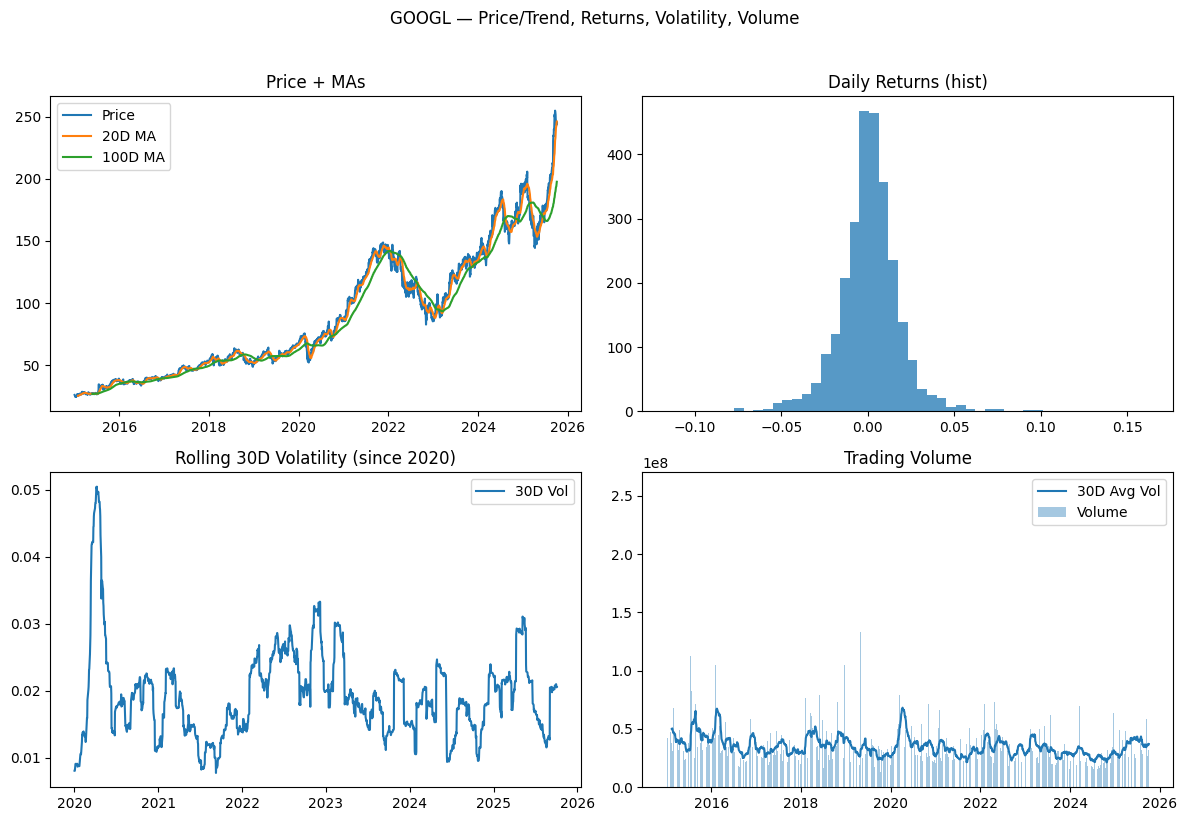

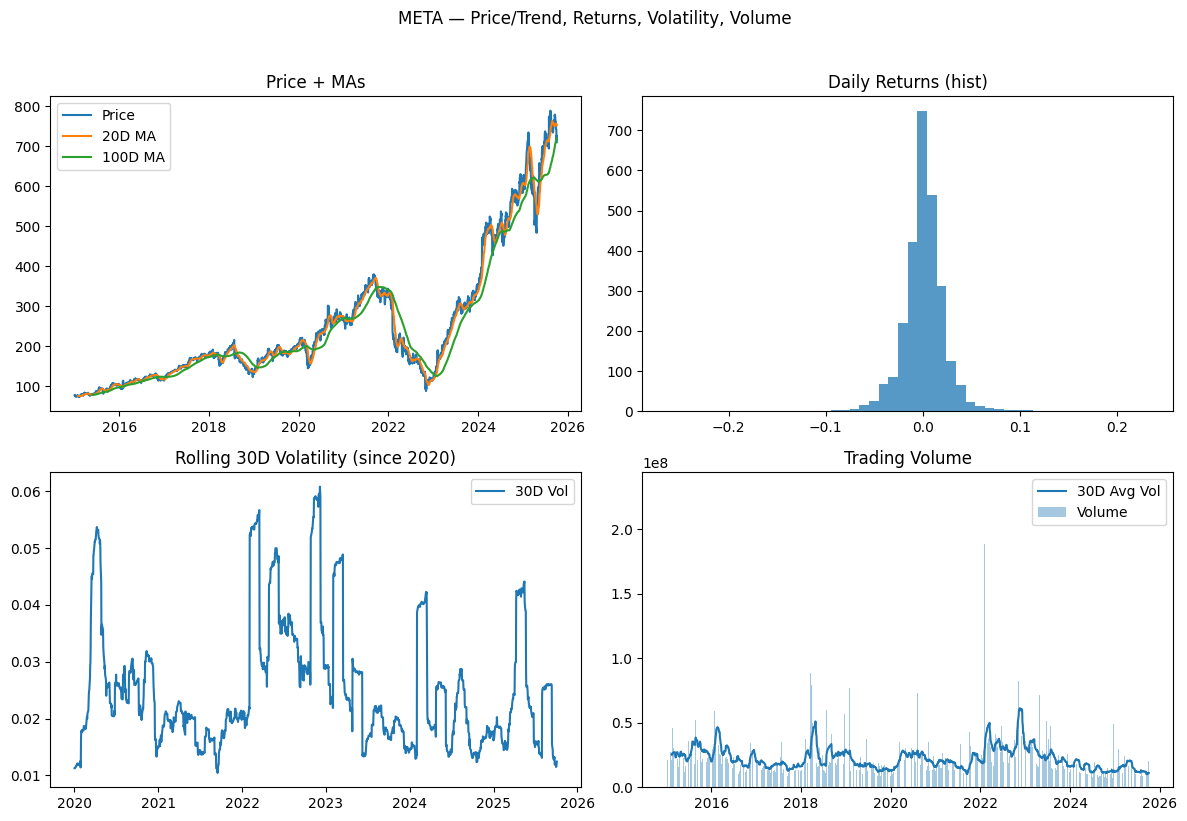

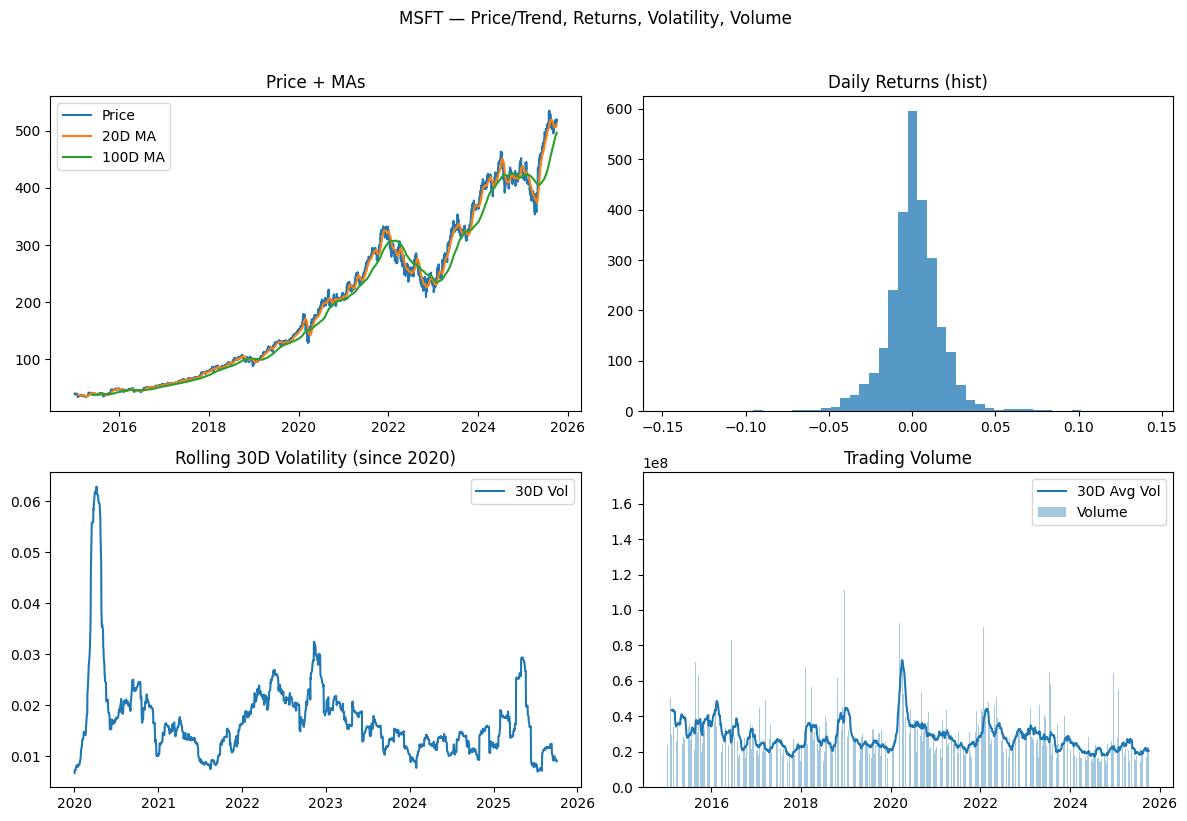

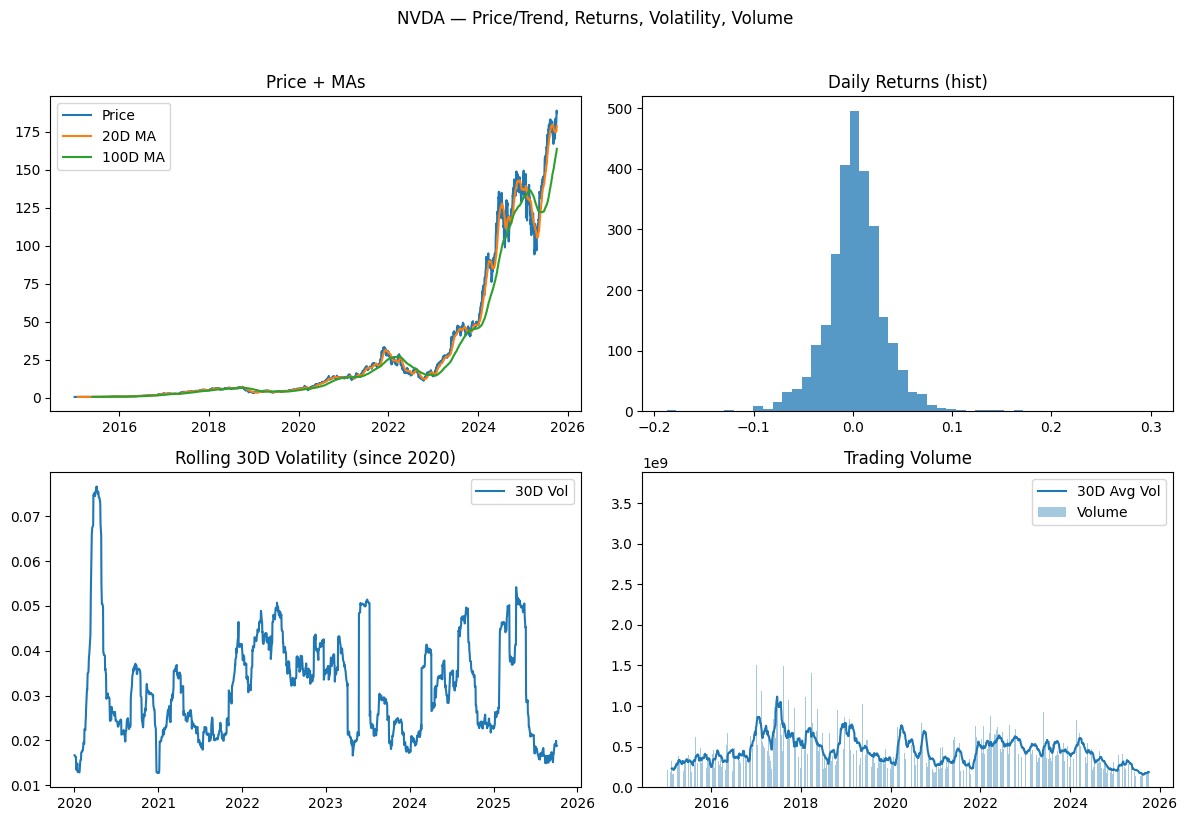

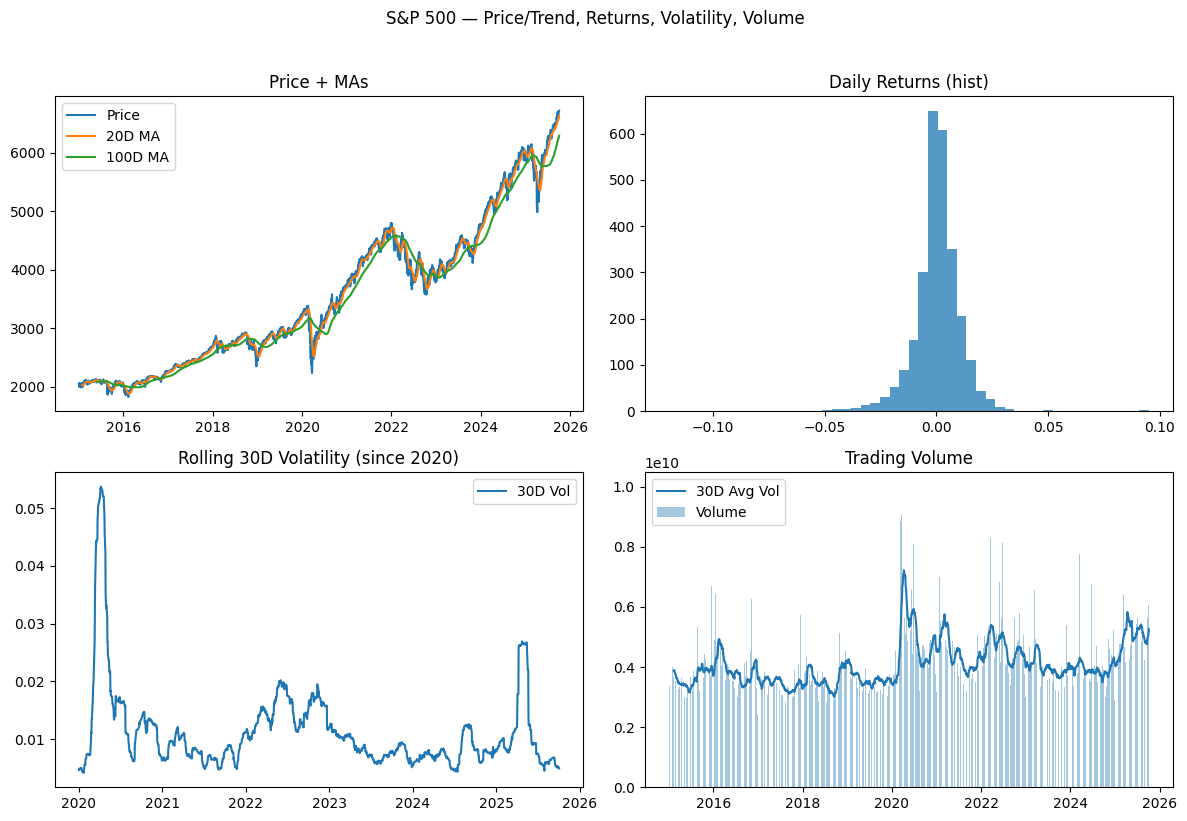

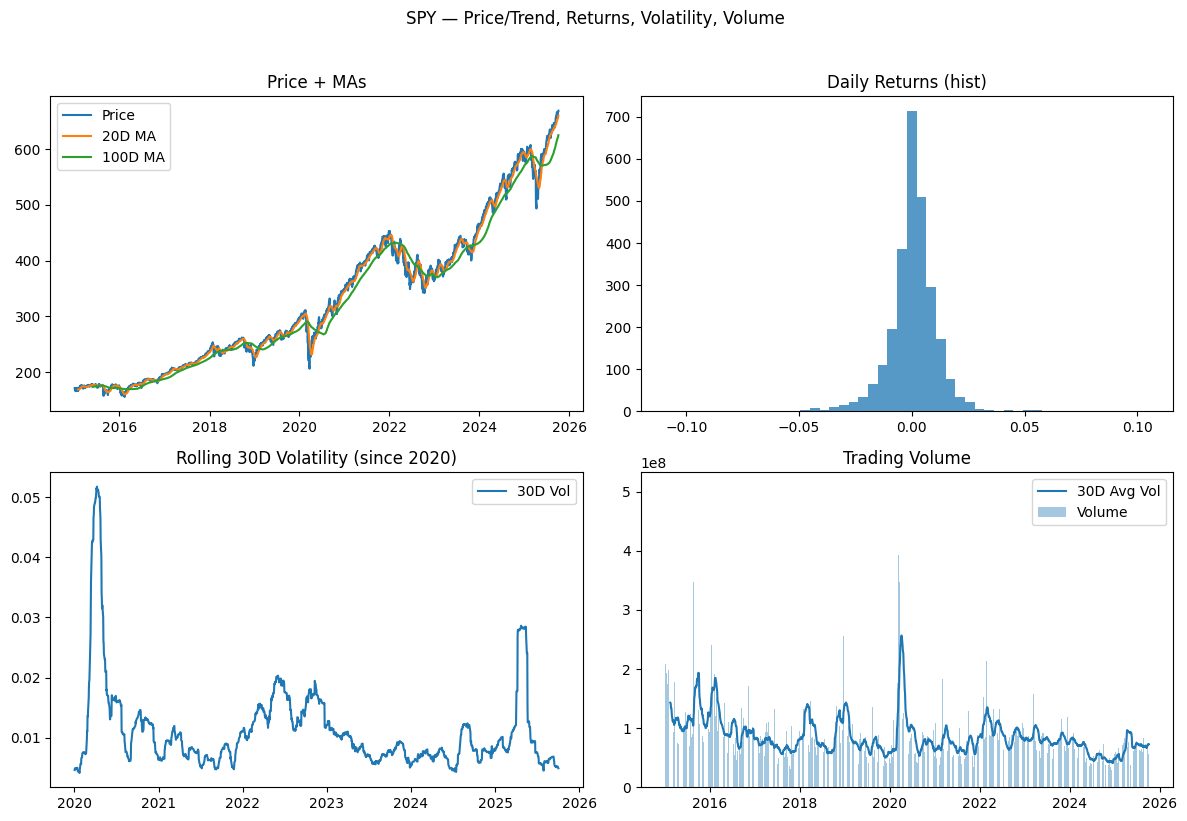

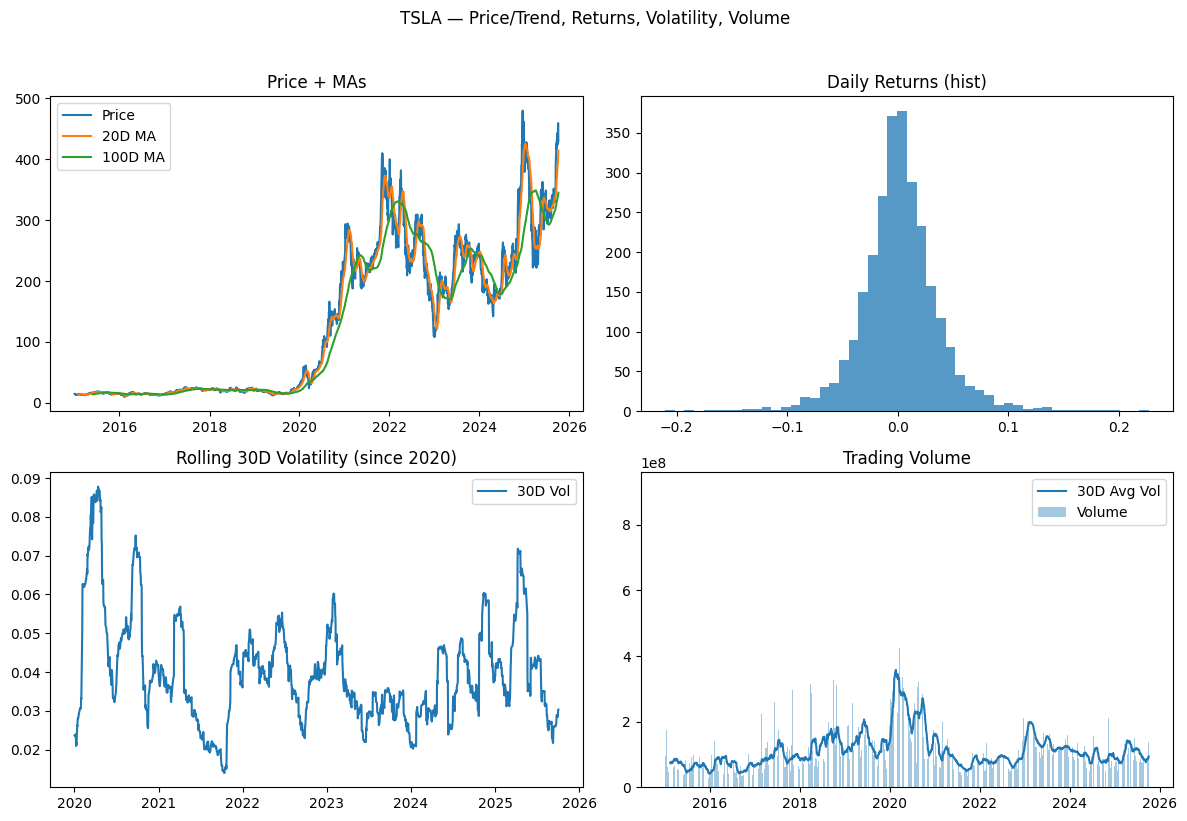

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Prep ---
stacked = stacked.copy()
stacked["Date"] = pd.to_datetime(stacked["Date"])

# find price column
price_cols = [c for c in stacked.columns if "adj" in c.lower() and "close" in c.lower()]
if not price_cols:
    price_cols = [c for c in stacked.columns if "close" in c.lower()]
price_col = price_cols[0]

# daily returns (if not already there)
if "Return" not in stacked.columns:
    stacked = stacked.sort_values(["Ticker","Date"])
    stacked["Return"] = stacked.groupby("Ticker")[price_col].pct_change()

# loop all tickers and plot the 4 mini-charts
for T in sorted(stacked["Ticker"].unique()):
    sub = stacked[stacked["Ticker"] == T].sort_values("Date").copy()
    sub["MA20"]   = sub[price_col].rolling(20).mean()
    sub["MA100"]  = sub[price_col].rolling(100).mean()
    sub["Vol30"]  = sub["Return"].rolling(30).std()
    if "Volume" in sub.columns:
        sub["VolMA30"] = sub["Volume"].rolling(30).mean()
    else:
        sub["VolMA30"] = np.nan

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"{T} — Price/Trend, Returns, Volatility, Volume", y=1.02)

    # Price + moving averages
    ax = axes[0,0]
    ax.plot(sub["Date"], sub[price_col], label="Price")
    ax.plot(sub["Date"], sub["MA20"],  label="20D MA")
    ax.plot(sub["Date"], sub["MA100"], label="100D MA")
    ax.set_title("Price + MAs"); ax.legend()

    # Returns histogram
    ax = axes[0,1]
    ax.hist(sub["Return"].dropna(), bins=50, alpha=0.75)
    ax.set_title("Daily Returns (hist)")

    # Rolling 30D volatility (zoom recent)
    ax = axes[1,0]
    recent = sub[sub["Date"] >= "2020-01-01"]
    ax.plot(recent["Date"], recent["Vol30"], label="30D Vol")
    ax.set_title("Rolling 30D Volatility (since 2020)"); ax.legend()

    # Volume + 30D avg
    ax = axes[1,1]
    if "Volume" in sub.columns:
        ax.bar(sub["Date"], sub["Volume"], alpha=0.4, label="Volume")
        ax.plot(sub["Date"], sub["VolMA30"], label="30D Avg Vol")
        ax.set_title("Trading Volume"); ax.legend()
    else:
        ax.text(0.5, 0.5, "No Volume column", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd


if "df" not in globals():
    # Minimal fallback: build labels from `stacked` if needed
    assert "stacked" in globals(), "Run the cell that builds `stacked` or `df` first."
    df = stacked.copy()
    df["Date"] = pd.to_datetime(df["Date"])
    df = df.sort_values(["Ticker","Date"])
    g = df.groupby("Ticker")
    # Targets
    df["y_open_t1"]   = g["Open"].shift(-1)
    df["y_ret_oo_t1"] = (g["Open"].shift(-1) / df["Open"]) - 1

# --- Find the S&P 500 ticker in your data ---
sp_candidates = ["S&P 500", "^GSPC", "SPX", "SP500", "SP-500", "SPY"]  # try index and SPY proxy
tickers = df["Ticker"].astype(str).unique().tolist()

chosen = None
for cand in sp_candidates:
    for t in tickers:
        if t.strip().lower() == cand.strip().lower():
            chosen = t
            break
    if chosen:
        break

if chosen is None:
    raise ValueError(f"Couldn't find an S&P 500 ticker in {tickers}. Try adding '^GSPC' or SPY.")

# --- Define label columns and optional direction label ---
label_cols = [c for c in df.columns if c.startswith("y_")]
if "y_ret_oo_t1" in df.columns and "y_dir_t1" not in df.columns:
    df["y_dir_t1"] = (df["y_ret_oo_t1"] > 0).astype(int)  # 1=up, 0=down
    label_cols = label_cols + ["y_dir_t1"]

# --- Print results ---
sp_labels = df[df["Ticker"] == chosen][["Date","Ticker"] + label_cols].dropna(subset=label_cols)
print(f"Using ticker: {chosen}")
print("Label columns:", label_cols)
print(sp_labels.tail(10))  # show recent label values

#  class balance for the up/down label
if "y_dir_t1" in sp_labels.columns:
    counts = sp_labels["y_dir_t1"].value_counts().rename(index={0:"down",1:"up"})
    print("Up/Down counts:", dict(counts))

Using ticker: S&P 500
Label columns: []
Price       Date   Ticker
24263 2025-09-22  S&P 500
24272 2025-09-23  S&P 500
24281 2025-09-24  S&P 500
24290 2025-09-25  S&P 500
24299 2025-09-26  S&P 500
24308 2025-09-29  S&P 500
24317 2025-09-30  S&P 500
24326 2025-10-01  S&P 500
24335 2025-10-02  S&P 500
24344 2025-10-03  S&P 500


In [ ]:
# Kaggle Data loading and putting in the content folder
!pip -q install kagglehub

import os, shutil, kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


Using Colab cache for faster access to the 'financial-news-headlines' dataset.
KaggleHub cached at: /kaggle/input/financial-news-headlines


'/content/news_data'

In [ ]:
cnbc = pd.read_csv('news_data/cnbc_headlines.csv')
guardian = pd.read_csv('news_data/guardian_headlines.csv')
reuters = pd.read_csv('news_data/reuters_headlines.csv')

In [ ]:
PATTERNS = {
    "AAPL":  r'(?<![A-Z0-9])\$?AAPL(?![A-Z0-9])|\bApple\b',
    "MSFT":  r'(?<![A-Z0-9])\$?MSFT(?![A-Z0-9])|\bMicrosoft\b',
    "GOOGL": r'(?<![A-Z0-9])\$?(?:GOOGL|GOOG)(?![A-Z0-9])|\b(?:Alphabet|Google)\b',
    "AMZN":  r'(?<![A-Z0-9])\$?AMZN(?![A-Z0-9])|\bAmazon\b',
    # acoid the common meta
    "META":  r'(?<![A-Z0-9])\$?META(?![A-Z0-9])|\bMeta Platforms?\b|\bFacebook\b',
    "NVDA":  r'(?<![A-Z0-9])\$?NVDA(?![A-Z0-9])|\bNVIDIA\b',
    "TSLA":  r'(?<![A-Z0-9])\$?TSLA(?![A-Z0-9])|\bTesla\b',
    "SPY":   r'(?<![A-Z0-9])\$?SPY(?![A-Z0-9])|\bSPDR\s+S&P\s*500\s+ETF(?:\s+Trust)?\b',
    "S&P500": r'(?:\^GSPC)|\bS&P\s*500\b'
}

def one_hot_companies(text_series: pd.Series,
                      patterns: dict = PATTERNS) -> pd.DataFrame:
    """
    input: the series of the text of the news
    out: the one-hot DataFrame of the news
    """
    out = {}
    for tick, pat in patterns.items():
        out[tick] = (
            text_series.str.contains(pat, flags=re.IGNORECASE, regex=True, na=False)
            .astype('int8')
        )
    return pd.DataFrame(out, index=text_series.index)


In [ ]:
cnbc_oh = one_hot_companies(cnbc['Headlines'])
guardian_oh = one_hot_companies(guardian['Headlines'])
reuters_oh = one_hot_companies(reuters['Headlines'])
# cnbc.loc[0]
cnbc = cnbc.join(cnbc_oh)
TICKERS[-1] = 'S&P500'
guardian = guardian.join(guardian_oh)
reuters = reuters.join(reuters_oh)

In [ ]:
cnbc_tickers = cnbc[cnbc[TICKERS].any(axis=1)]
guardian_tickers = guardian[guardian[TICKERS].any(axis=1)]
reuters_tickers = reuters[reuters[TICKERS].any(axis=1)]

In [ ]:
import re

M = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}

PAT1 = re.compile(r'\b([A-Za-z]{3})\s+(\d{1,2})\s+(\d{4})\b')        # Jul 18 2020
PAT2 = re.compile(r'\b(\d{1,2})-([A-Za-z]{3})-(\d{2,4})\b')          # 18-Dec-17/2017
PAT3 = re.compile(r'\b(\d{1,2})\s+([A-Za-z]{3})\s+(\d{4})\b')        # ... Tue, 2 Jan 2018

def norm_y(y): y=int(y); return (2000+y if y<70 else 1900+y) if y<100 else y
def iso(s:str):
    if ',' in s:
      s = s.split(',')[-1]
    if not isinstance(s,str): return None
    for p in (PAT1,PAT2,PAT3):
        m=p.search(s);
        if m:
            a,b,c=m.groups()
            if p is PAT1: mth,day,yr=a,b,c
            elif p is PAT2: day,mth,yr=a,b,c
            else: day,mth,yr=a,b,c
            mnum=M.get(mth.lower(),None)
            if not mnum: return None
            return f"{norm_y(yr):04d}-{mnum:02d}-{int(day):02d}"
    return None

cnbc_tickers['Date']= cnbc_tickers['Time'].map(iso);
guardian_tickers['Date']= guardian_tickers['Time'].map(iso);
reuters_tickers['Date']= reuters_tickers['Time'].map(iso);

/tmp/ipython-input-3034738485.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnbc_tickers['Date']= cnbc_tickers['Time'].map(iso);
/tmp/ipython-input-3034738485.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_tickers['Date']= guardian_tickers['Time'].map(iso);
/tmp/ipython-input-3034738485.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
cnbc_tickers

Headlines  \
16    Charts suggest the S&P 500 climb will stall ou...   
32    The S&P 500 'could get ugly' in the near futur...   
59    Charts suggest new highs 'could be on the tabl...   
102   We stand behind our 3400 target for S&P 500 by...   
104   Cramer's lightning round: Microsoft fits the p...   
...                                                 ...   
3047  Cramer: The S&P 500's winners for 2017 could s...   
3049  Cramer: The S&P 500's winners for 2017 could s...   
3066      Cramer Remix: My prediction for Apple in 2018   
3068  Cramer Remix: Apple's stock won't slow down in...   
3071  Cramer's S&P 500 and Dow charts indicate a str...   

                                Time  \
16     7:02  PM ET Tue, 14 July 2020   
32     7:13  PM ET Wed,  1 July 2020   
59     7:47  PM ET Thu, 18 June 2020   
102    3:19  AM ET Thu,  4 June 2020   
104    8:21  PM ET Wed,  3 June 2020   
...                              ...   
3047    7:45  PM ET Fri,  5 Jan 2018   
3049    5:18  PM ET Fri,  5 Jan 2018   
3066    7:35  PM ET Tue,  2 Jan 2018   
3068    7:02  PM ET Tue,  2 Jan 2018   
3071    7:21  PM ET Tue,  2 Jan 2018   

                                            Description  AAPL  MSFT  GOOGL  \
16    The charts, as interpreted by Larry Williams, ...     0     0      0   
32    The S&P 500 could be riding into a "make-or-br...     0     0      0   
59    "If the S&P 500 really does surge to 3,400, up...     0     0      0   
102   Brian Belski of BMO Capital Markets says in ad...     0     0      0   
104   "Mad Money" host Jim Cramer rings the lightnin...     0     1      0   
...                                                 ...   ...   ...    ...   
3047  Jim Cramer reviewed the S&P 500's best perform...     0     0      0   
3049  Jim Cramer reviewed the S&P 500's best perform...     0     0      0   
3066  Jim Cramer dished out his take on whether Appl...     1     0      0   
3068  Jim Cramer dished out his take on whether Appl...     1     0      0   
3071  Jim Cramer warned investors about getting too ...     0     0      0   

      AMZN  META  NVDA  TSLA  SPY  S&P500        Date  
16       0     0     0     0    0       1        None  
32       0     0     0     0    0       1        None  
59       0     0     0     0    0       1        None  
102      0     0     0     0    0       1        None  
104      0     0     0     0    0       0        None  
...    ...   ...   ...   ...  ...     ...         ...  
3047     0     0     0     0    0       1  2018-01-05  
3049     0     0     0     0    0       1  2018-01-05  
3066     0     0     0     0    0       0  2018-01-02  
3068     0     0     0     0    0       0  2018-01-02  
3071     0     0     0     0    0       1  2018-01-02  

[307 rows x 13 columns]

In [ ]:
guardian_tickers

Time                                          Headlines  AAPL  \
6      18-Jul-20              Can Tesla justify a $300bn valuation?     0   
62     15-Jul-20  Nils Pratley on finance  \n\n\n  Margrethe Ves...     1   
74     15-Jul-20  Apple does not need to pay €13bn Irish tax bil...     1   
237     8-Jul-20  Next, Asos and Amazon drop Boohoo amid Leicest...     0   
280     5-Jul-20  Scammers can create fake business ads on Googl...     0   
...          ...                                                ...   ...   
17614  28-Dec-17  Gambling-style apps offered on Facebook withou...     0   
17647  25-Dec-17  New York's vanishing shops and storefronts: 'I...     0   
17672  22-Dec-17  Facebook signs deal with Universal to give use...     0   
17770  18-Dec-17  Amazon Prime could face investigation over del...     0   
17775  18-Dec-17                  Is Monzo the Facebook of banking?     0   

       MSFT  GOOGL  AMZN  META  NVDA  TSLA  SPY  S&P500        Date  
6         0      0     0     0     0     1    0       0  2020-07-18  
62        0      0     0     0     0     0    0       0  2020-07-15  
74        0      0     0     0     0     0    0       0  2020-07-15  
237       0      0     1     0     0     0    0       0  2020-07-08  
280       0      1     0     0     0     0    0       0  2020-07-05  
...     ...    ...   ...   ...   ...   ...  ...     ...         ...  
17614     0      0     0     1     0     0    0       0  2017-12-28  
17647     0      0     1     0     0     0    0       0  2017-12-25  
17672     0      0     0     1     0     0    0       0  2017-12-22  
17770     0      0     1     0     0     0    0       0  2017-12-18  
17775     0      0     0     1     0     0    0       0  2017-12-18  

[475 rows x 12 columns]

In [ ]:
reuters_tickers

Headlines         Time  \
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
8      Google bans ads on coronavirus conspiracy theo...  Jul 17 2020   
11     S&P 500 ends higher as traders weigh stimulus ...  Jul 17 2020   
12     FTC considering deposing top Facebook executiv...  Jul 17 2020   
57     Microsoft trims jobs as it enters new fiscal year  Jul 16 2020   
...                                                  ...          ...   
32756  Privacy issues emerge as major business risk f...  Mar 20 2018   
32757  Google launches news initiative to combat fake...  Mar 20 2018   
32758  UK investigates Facebook over data breach, to ...  Mar 20 2018   
32759  Facebook's lead EU regulator 'following up' on...  Mar 20 2018   
32763  White House welcomes looks into reports Trump'...  Mar 20 2018   

                                             Description  AAPL  MSFT  GOOGL  \
1      Walt Disney  has become the latest company to ...     0     0      0   
8      Alphabet Inc's Google said on Friday it would ...     0     0      1   
11     The S&P 500 ended higher on Friday as investor...     0     0      0   
12     The U.S. Federal Trade Commission is consideri...     0     0      0   
57     Microsoft Corp said on Thursday it had trimmed...     0     1      0   
...                                                  ...   ...   ...    ...   
32756  Facebook faces substantial business risks from...     0     0      0   
32757  Alphabet Inc's  Google is launching the Google...     0     0      1   
32758  Britain is investigating whether Facebook did ...     0     0      0   
32759  Facebook's lead regulator in the European Unio...     0     0      0   
32763  President Donald Trump wants Americans' privac...     0     0      0   

       AMZN  META  NVDA  TSLA  SPY  S&P500        Date  
1         0     1     0     0    0       0  2020-07-18  
8         0     0     0     0    0       0  2020-07-17  
11        0     0     0     0    0       1  2020-07-17  
12        0     1     0     0    0       0  2020-07-17  
57        0     0     0     0    0       0  2020-07-16  
...     ...   ...   ...   ...  ...     ...         ...  
32756     0     1     0     0    0       0  2018-03-20  
32757     0     0     0     0    0       0  2018-03-20  
32758     0     1     0     0    0       0  2018-03-20  
32759     0     1     0     0    0       0  2018-03-20  
32763     0     1     0     0    0       0  2018-03-20  

[2723 rows x 13 columns]